In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

from data_cube import DataCube
from ssm import SSM
from snf2 import SNF

In [2]:
dc = DataCube(
    subjects="all",
    gestures=["1"],
    channels=["4", "6"],
    data_grp="parsed"
)
dc.load_data()
dc.rms_smooth(300, 20)
dc.normalize_modalities(smooth=True)

---

subject 03; gesture 1_0_2


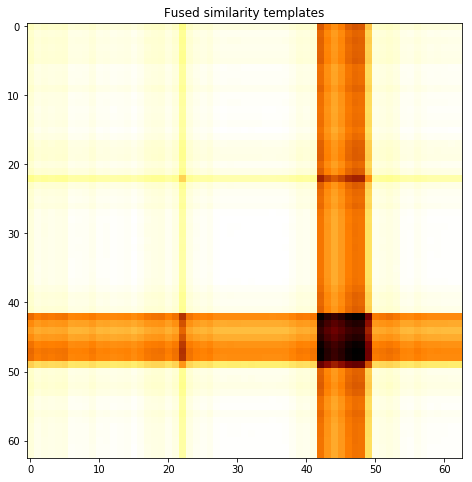

subject 03; gesture 1_0_1


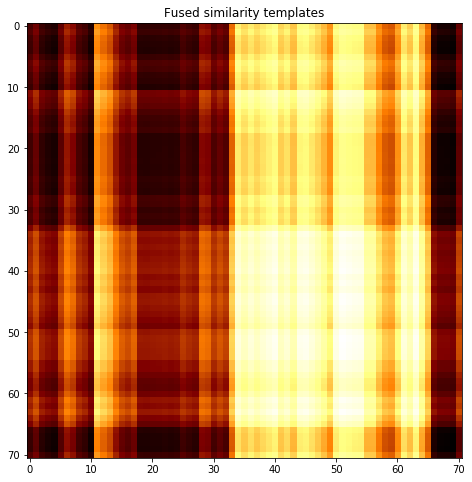

subject 03; gesture 1_1_1


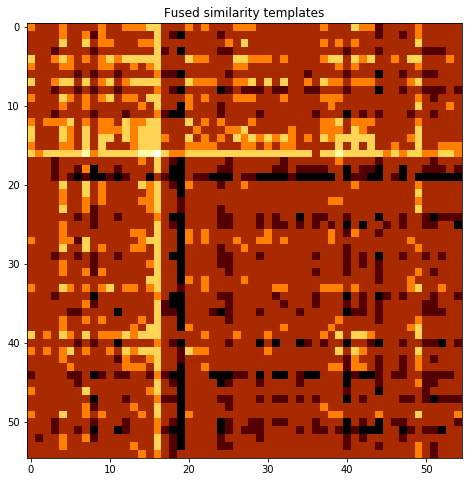

subject 03; gesture 1_1_2


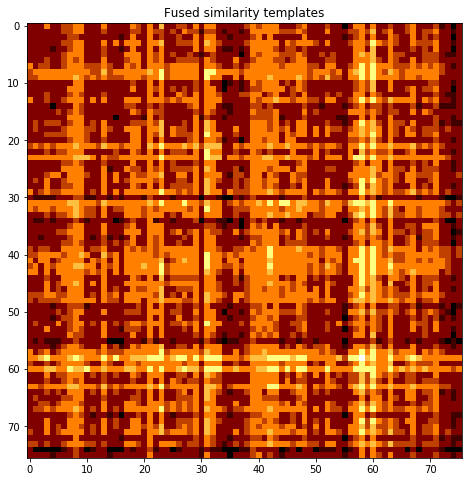

subject 04; gesture 1_0_2


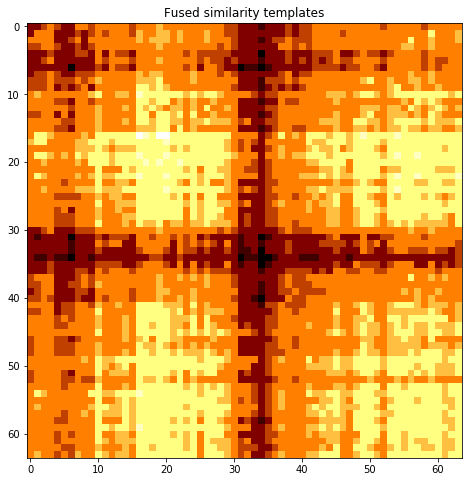

subject 04; gesture 1_0_1


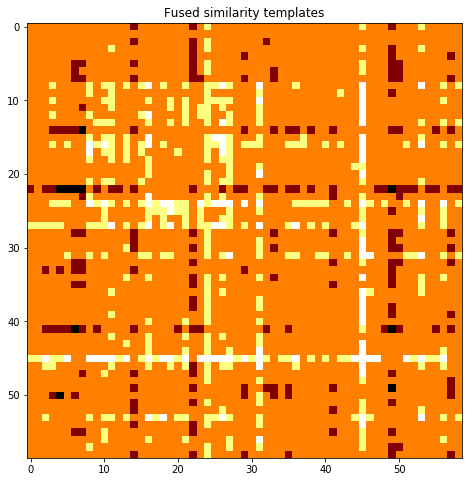

subject 04; gesture 1_1_1


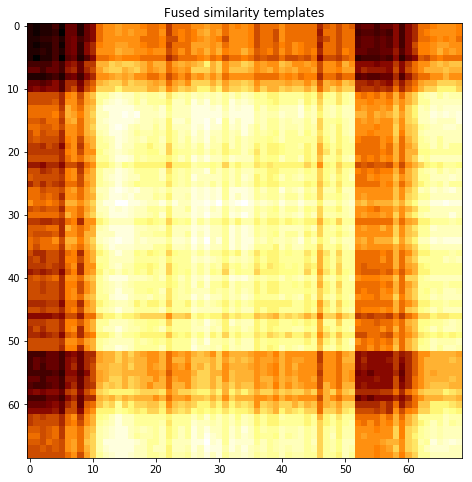

subject 04; gesture 1_1_2


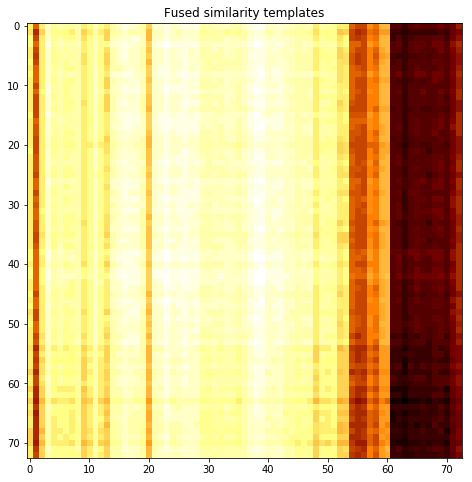

subject 32; gesture 1_0_2


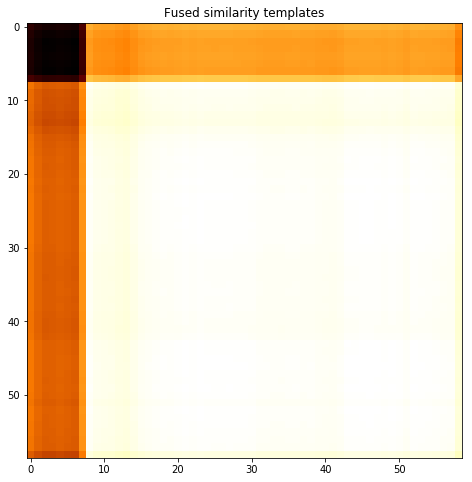

subject 32; gesture 1_0_1


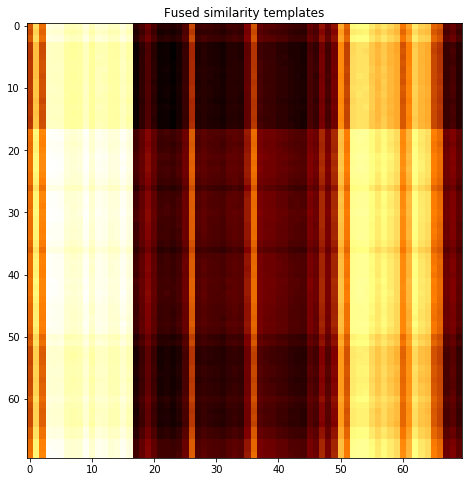

subject 32; gesture 1_1_1


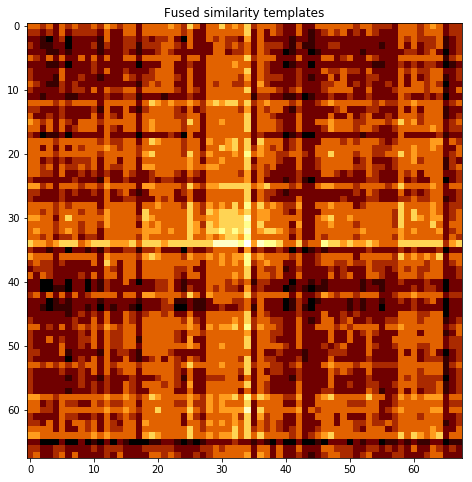

subject 32; gesture 1_1_2


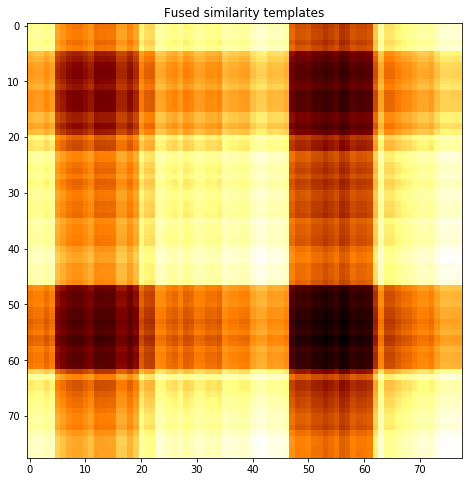

subject 35; gesture 1_0_2


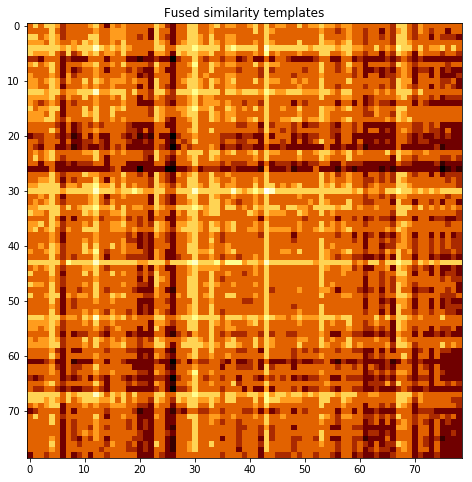

subject 35; gesture 1_0_1


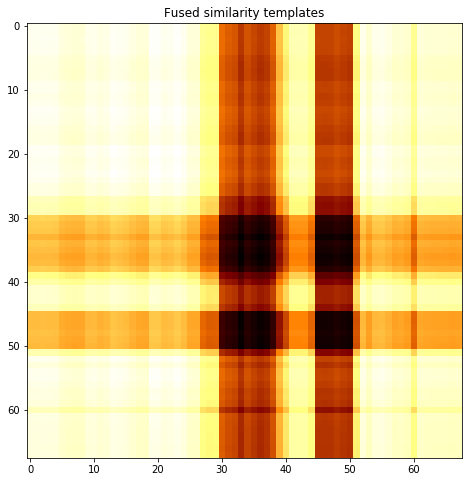

subject 35; gesture 1_1_1


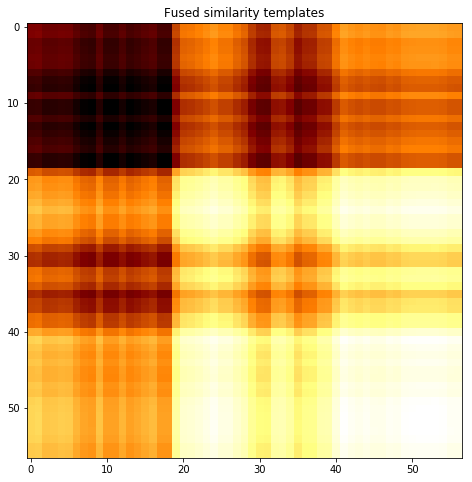

subject 35; gesture 1_1_2


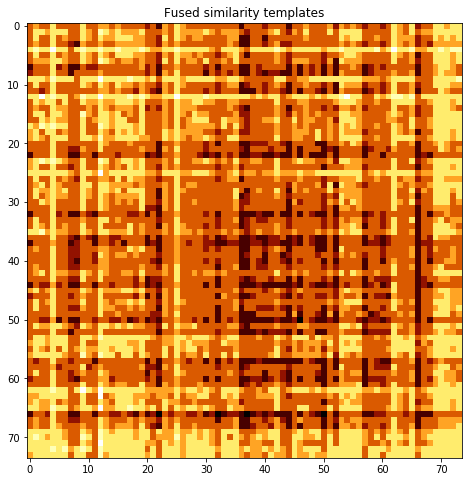

subject 34; gesture 1_0_2


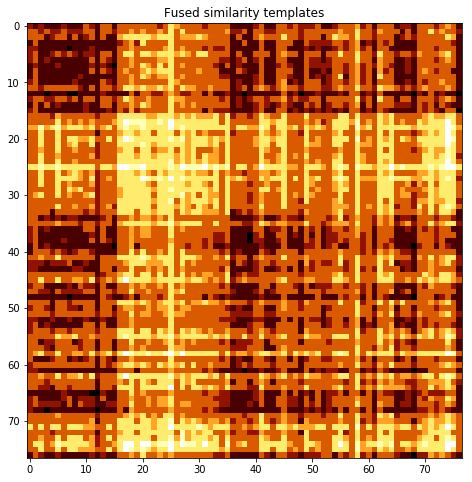

subject 34; gesture 1_0_1


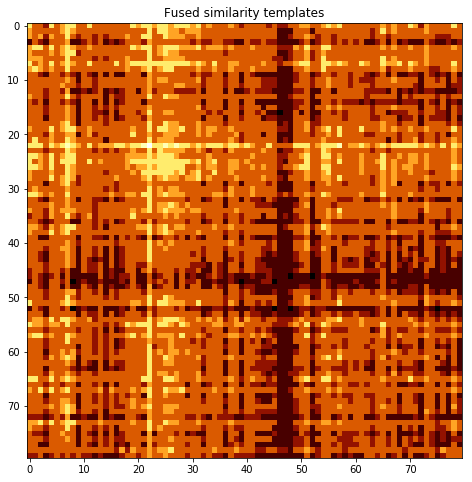

subject 34; gesture 1_1_1


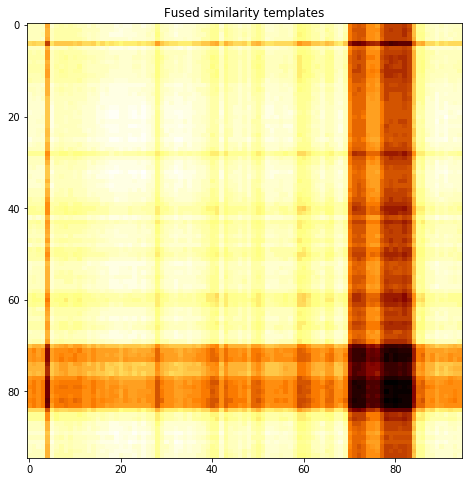

subject 34; gesture 1_1_2


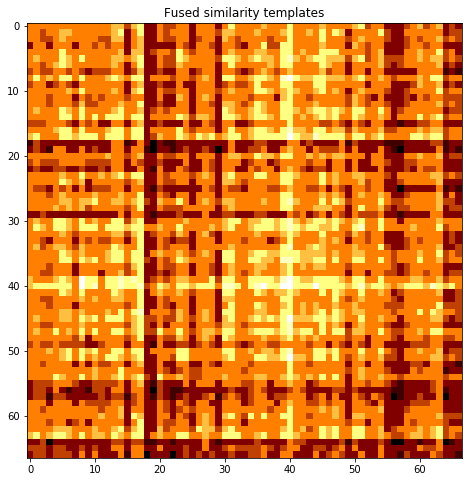

subject 33; gesture 1_0_2


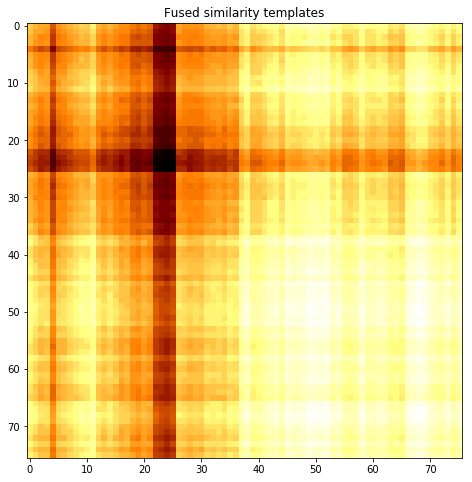

subject 33; gesture 1_0_1


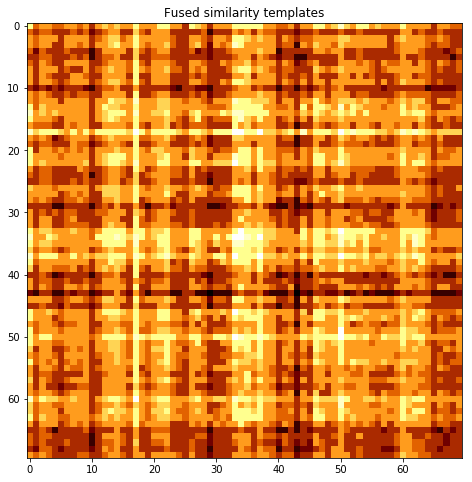

subject 33; gesture 1_1_1


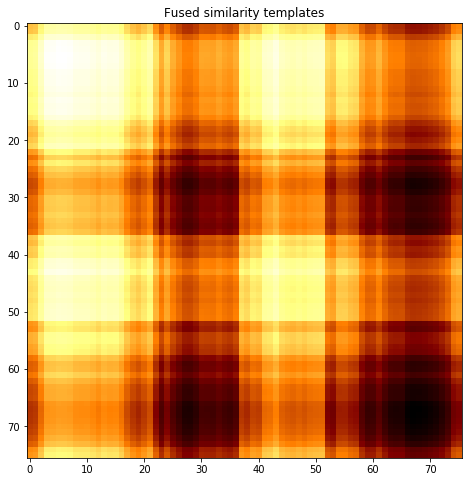

subject 33; gesture 1_1_2


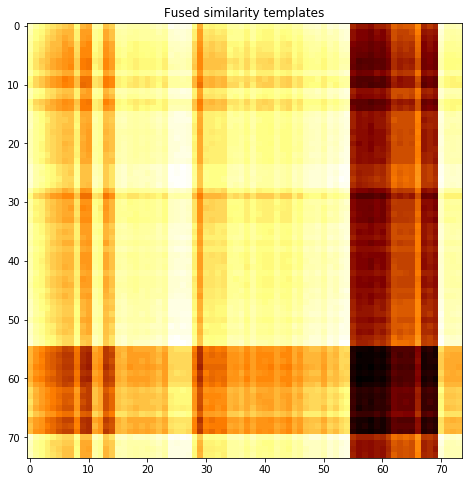

subject 05; gesture 1_0_2


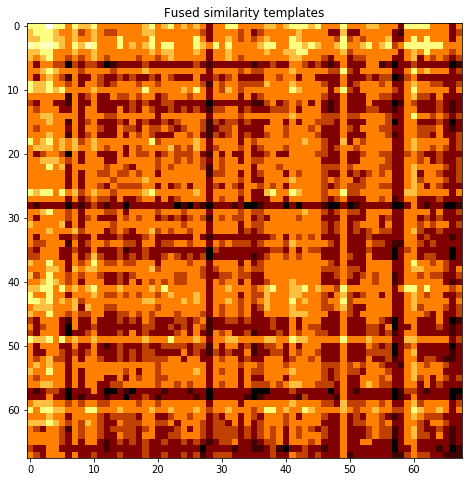

subject 05; gesture 1_0_1


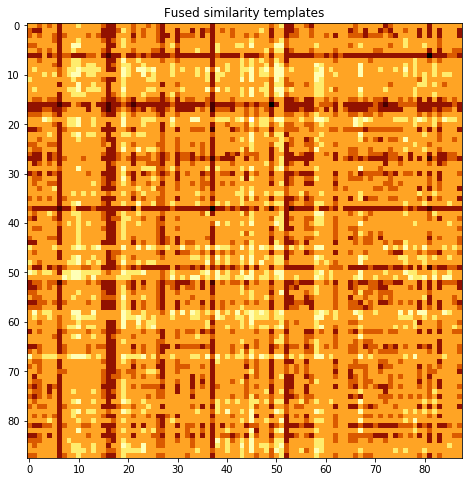

subject 05; gesture 1_1_1


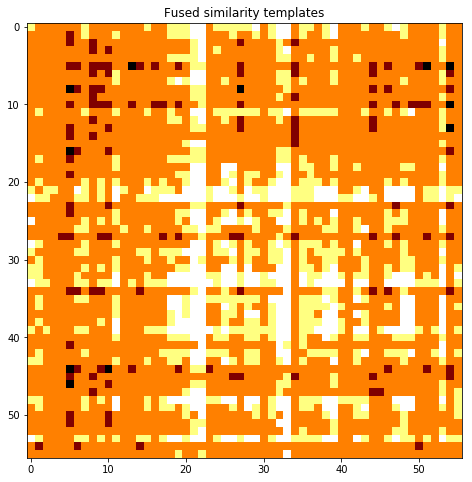

subject 05; gesture 1_1_2


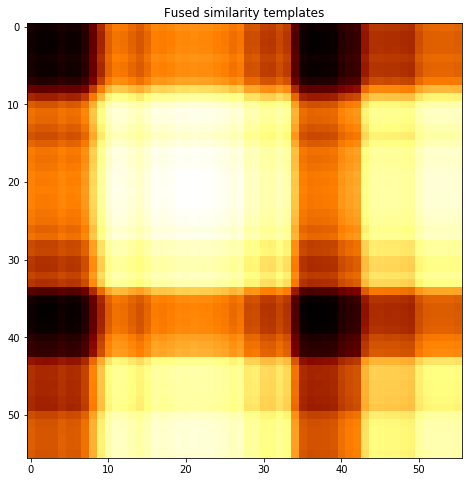

subject 02; gesture 1_0_2


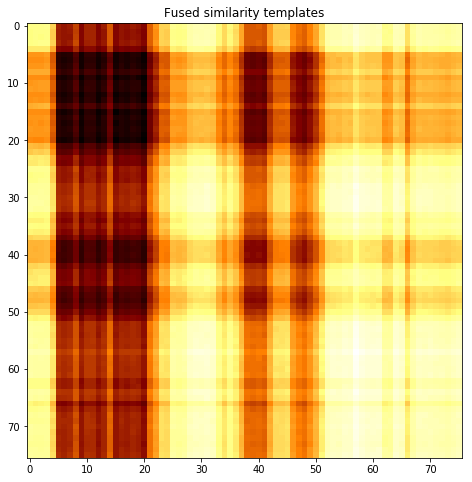

subject 02; gesture 1_0_1


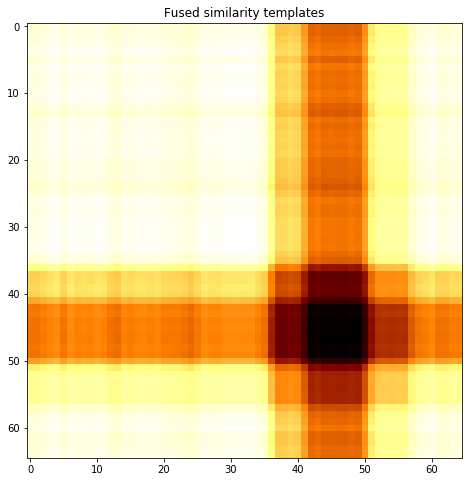

subject 02; gesture 1_1_1


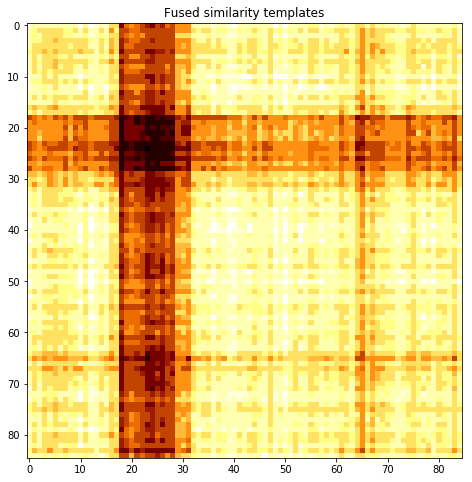

subject 02; gesture 1_1_2


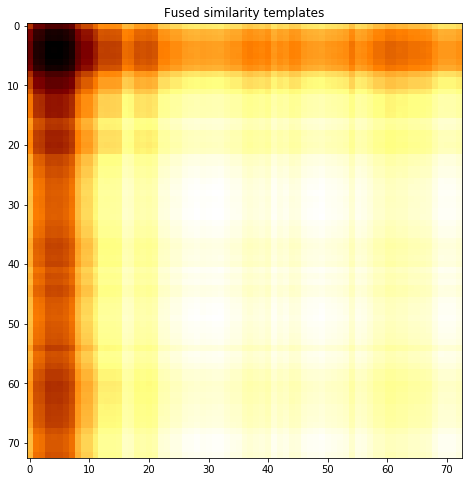

subject 20; gesture 1_0_2


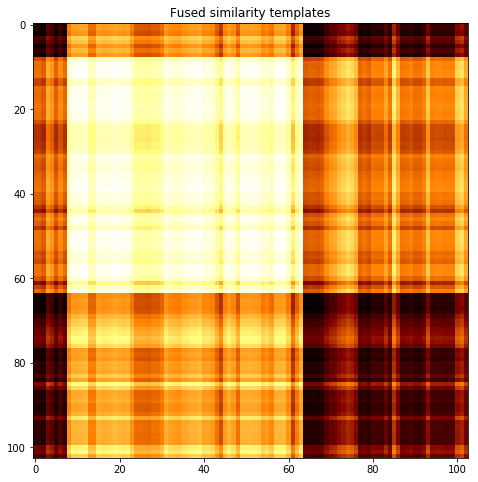

subject 20; gesture 1_0_1


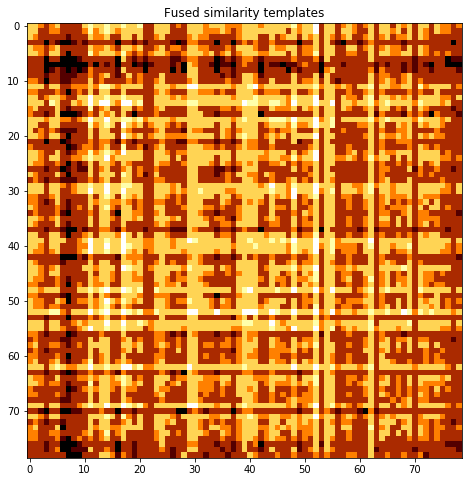

subject 20; gesture 1_1_1


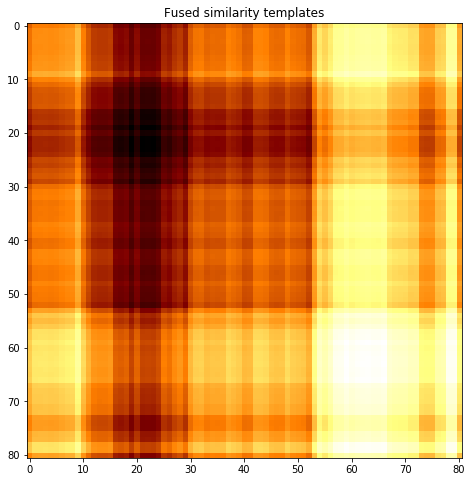

subject 20; gesture 1_1_2


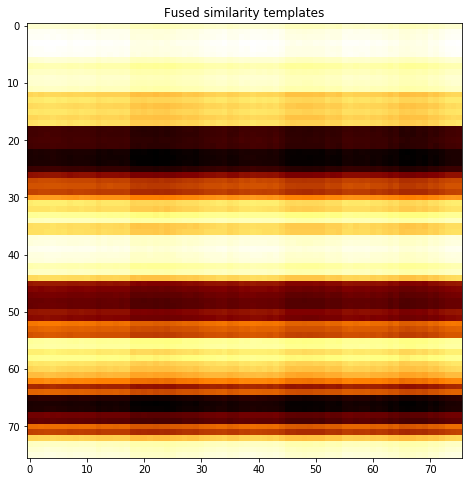

subject 18; gesture 1_0_2


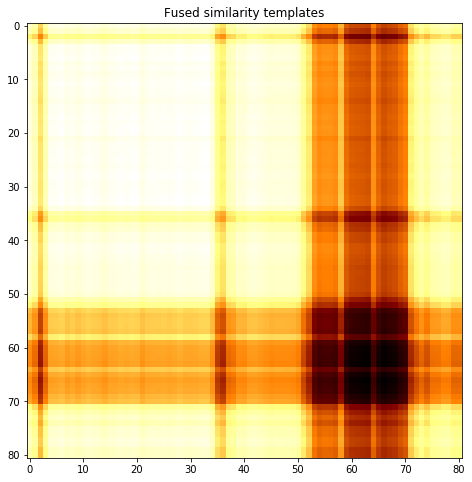

subject 18; gesture 1_0_1


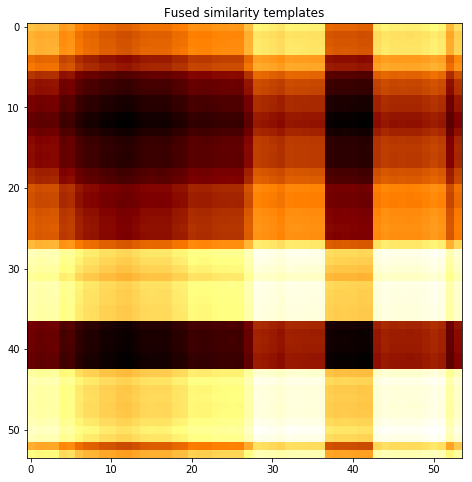

subject 18; gesture 1_1_1


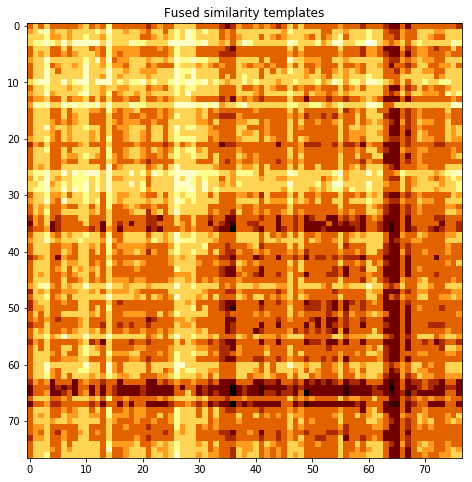

subject 18; gesture 1_1_2


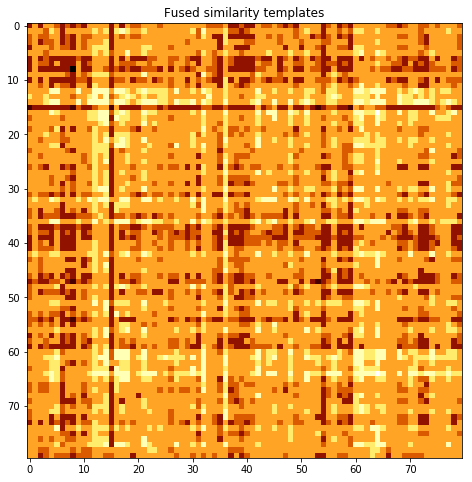

subject 27; gesture 1_0_2


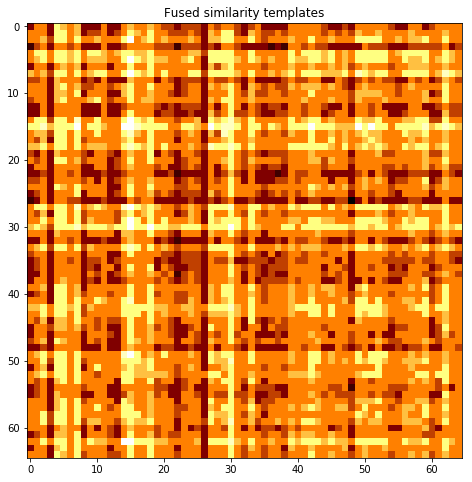

subject 27; gesture 1_0_1


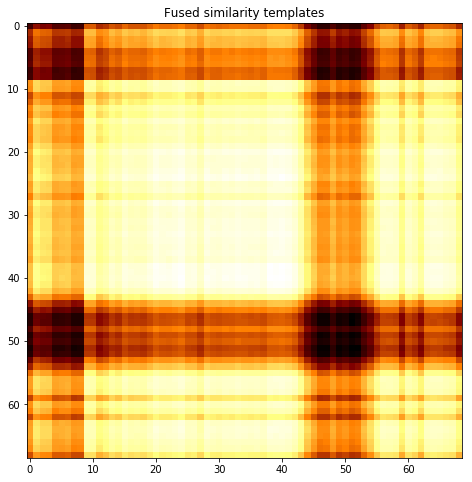

subject 27; gesture 1_1_1


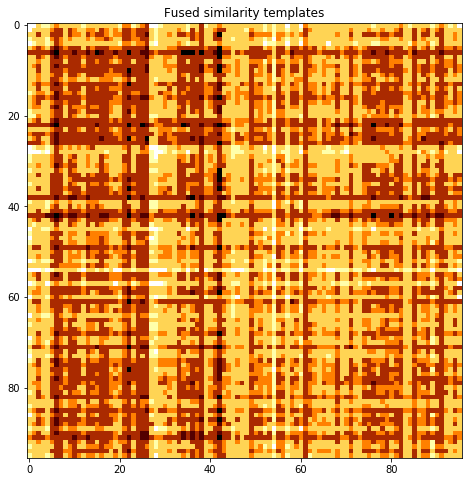

subject 27; gesture 1_1_2


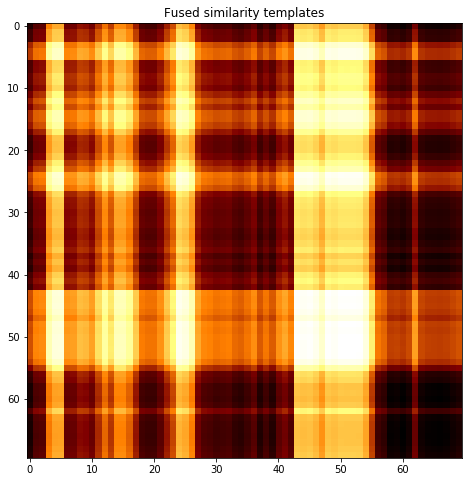

subject 11; gesture 1_0_2


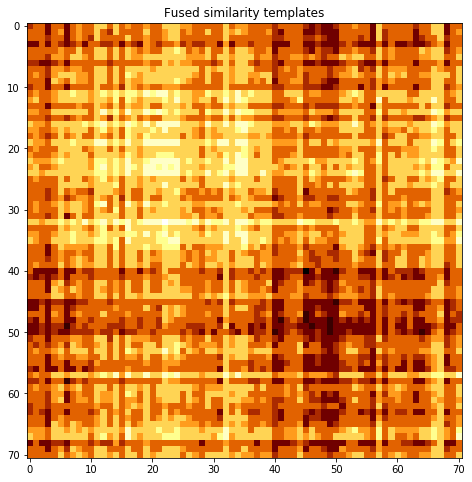

subject 11; gesture 1_0_1


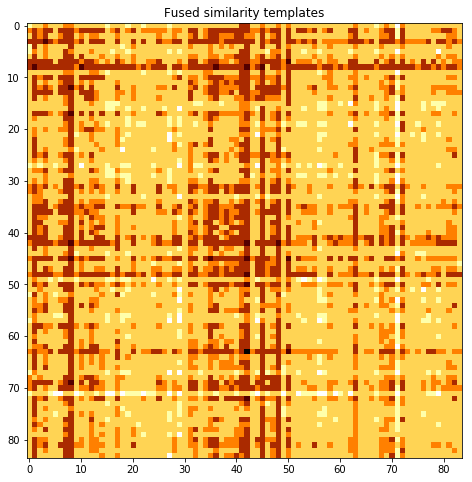

subject 11; gesture 1_1_1


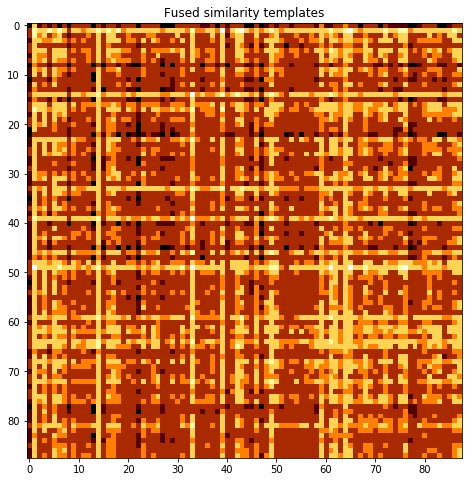

subject 11; gesture 1_1_2


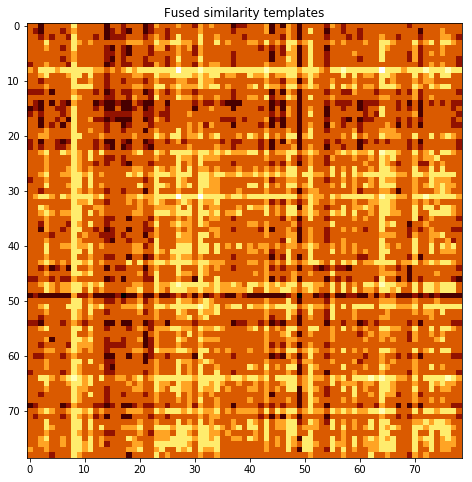

subject 29; gesture 1_0_2


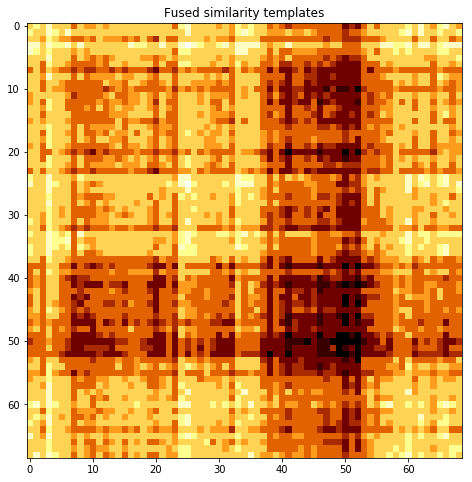

subject 29; gesture 1_0_1


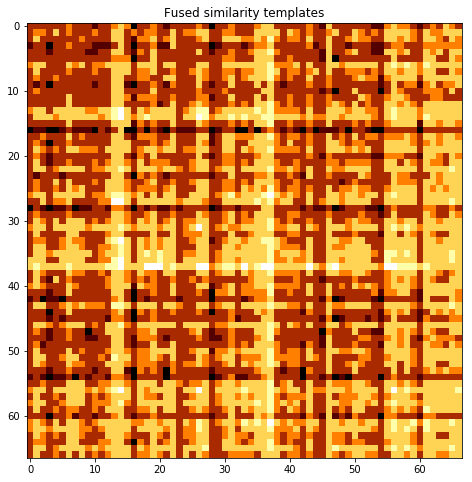

subject 29; gesture 1_1_1


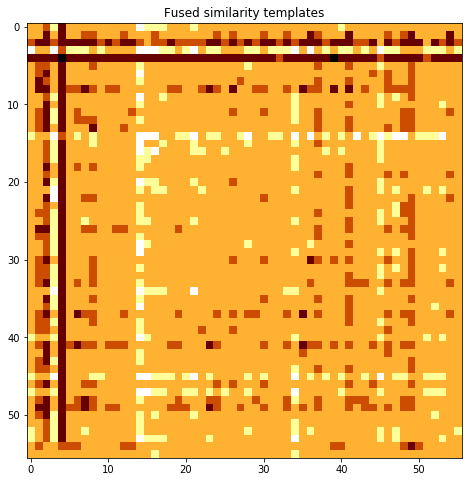

subject 29; gesture 1_1_2


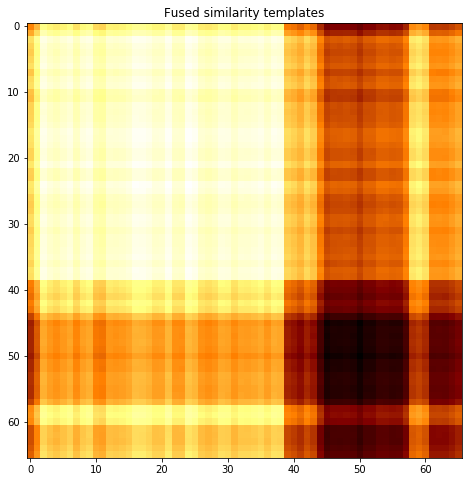

subject 16; gesture 1_0_2


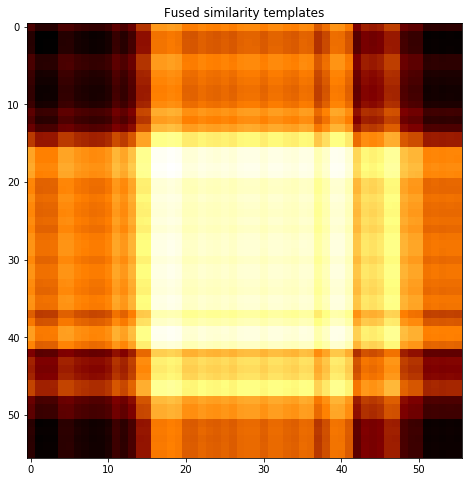

subject 16; gesture 1_0_1


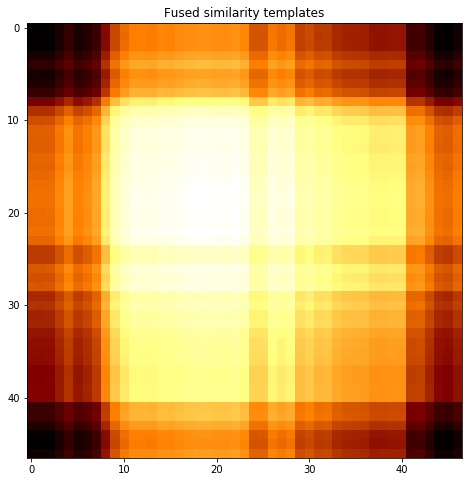

subject 16; gesture 1_1_1


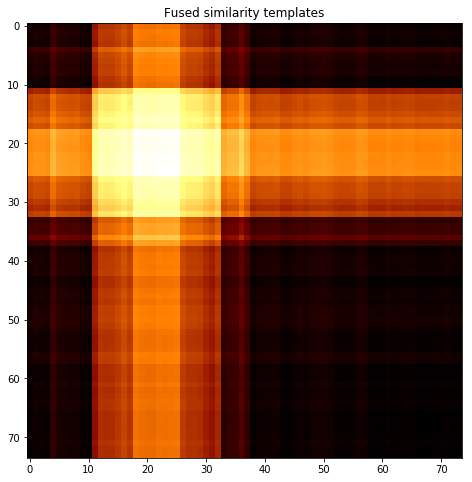

subject 16; gesture 1_1_2


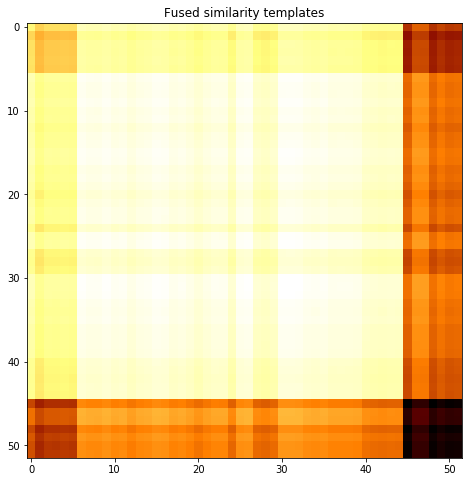

subject 28; gesture 1_0_2


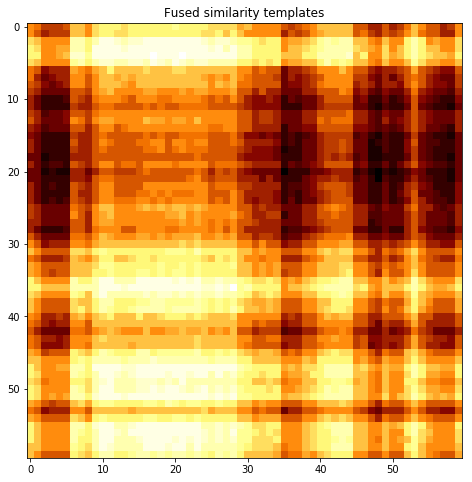

subject 28; gesture 1_0_1


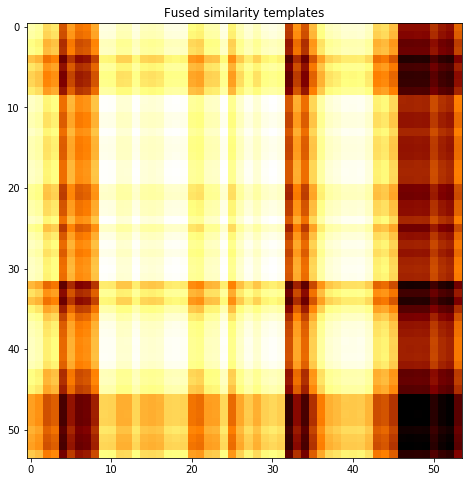

subject 28; gesture 1_1_1


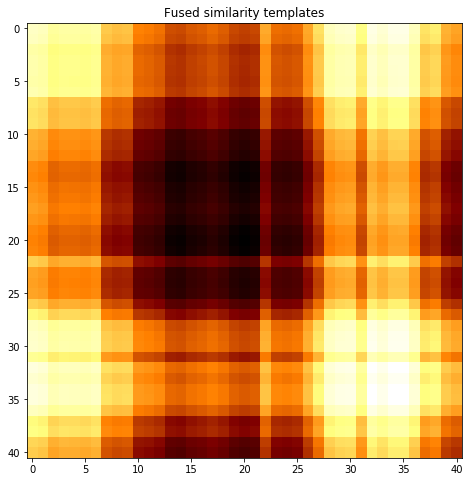

subject 28; gesture 1_1_2


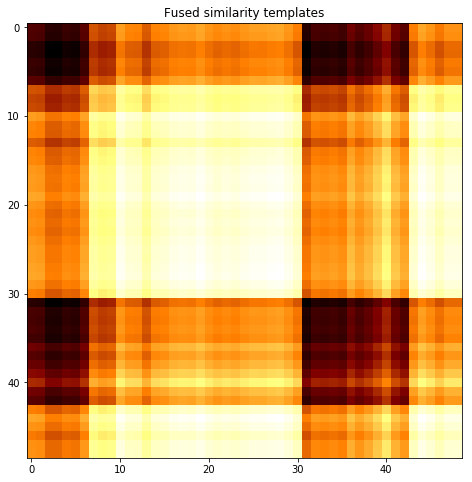

subject 17; gesture 1_0_2


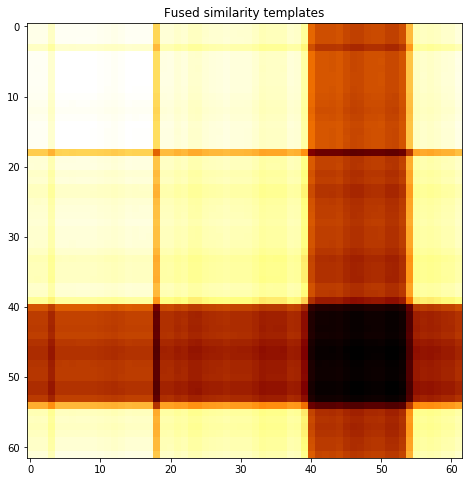

subject 17; gesture 1_0_1


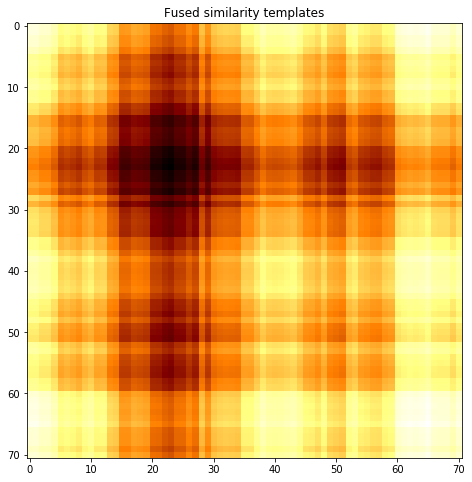

subject 17; gesture 1_1_1


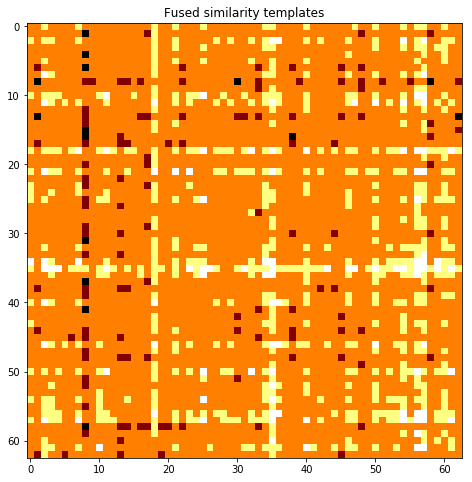

subject 17; gesture 1_1_2


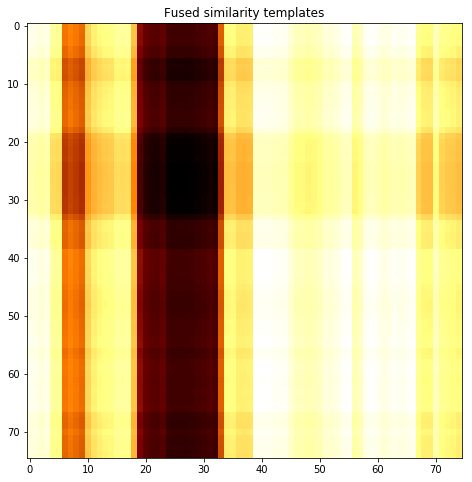

subject 10; gesture 1_0_2


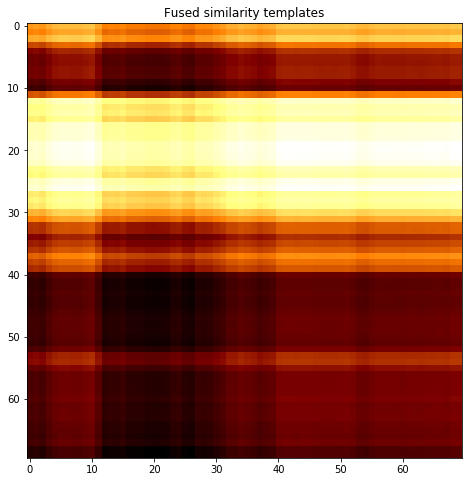

subject 10; gesture 1_0_1


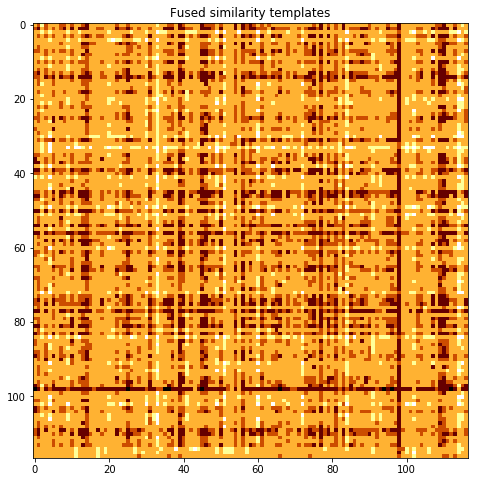

subject 10; gesture 1_1_1


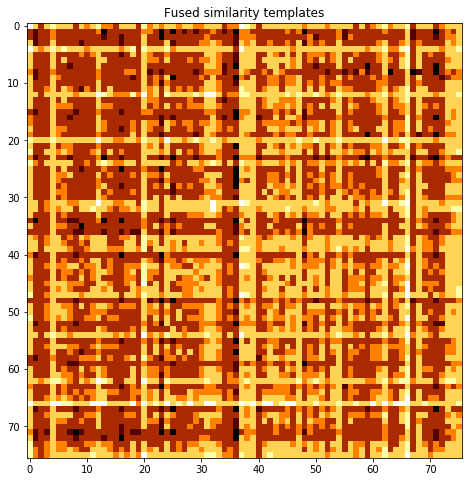

subject 10; gesture 1_1_2


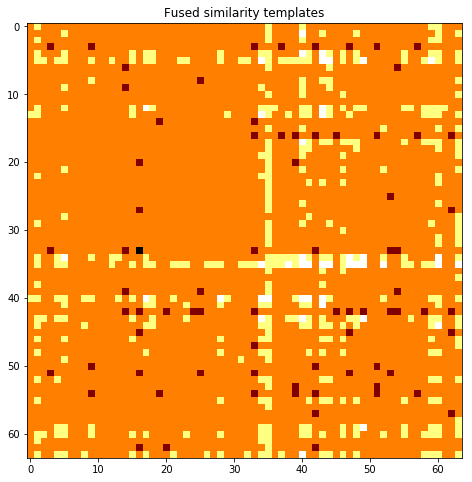

subject 19; gesture 1_0_2


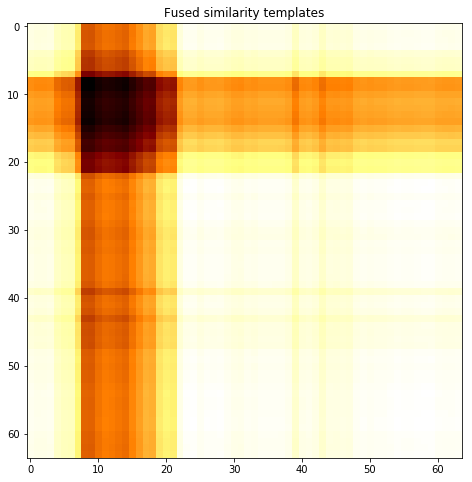

subject 19; gesture 1_0_1


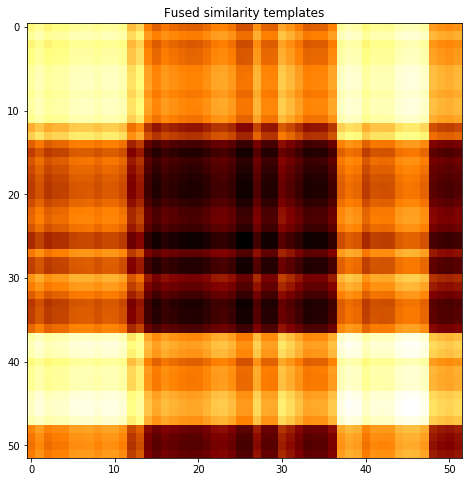

subject 19; gesture 1_1_1


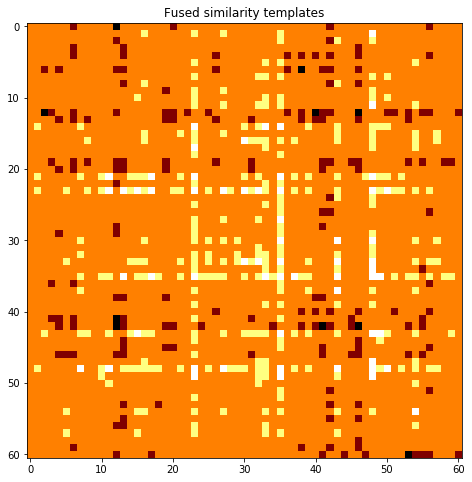

subject 19; gesture 1_1_2


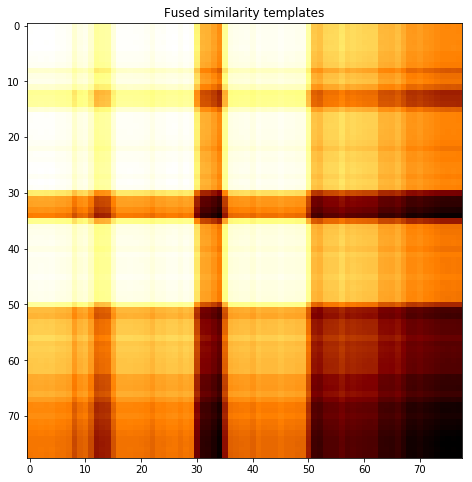

subject 26; gesture 1_0_2


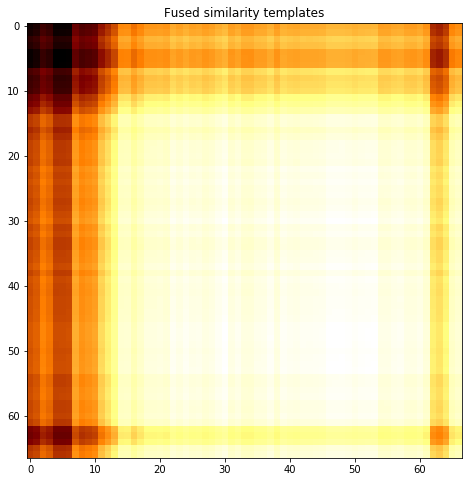

subject 26; gesture 1_0_1


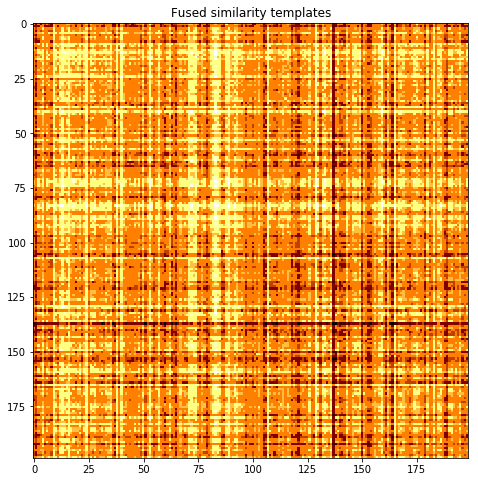

subject 26; gesture 1_1_1


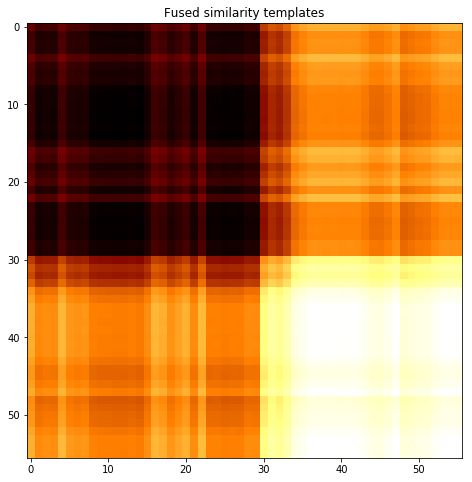

subject 26; gesture 1_1_2


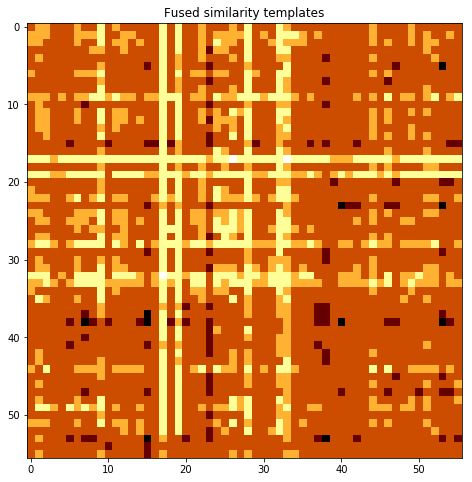

subject 21; gesture 1_0_2


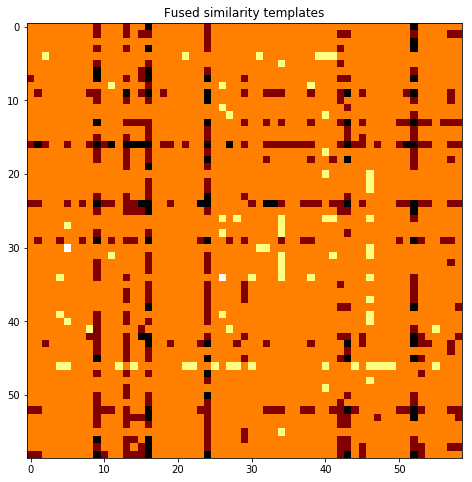

subject 21; gesture 1_0_1


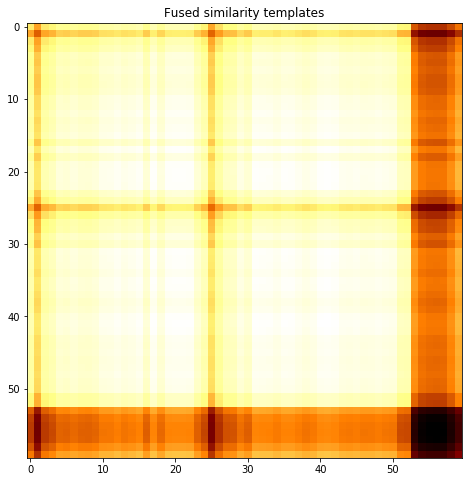

subject 21; gesture 1_1_1


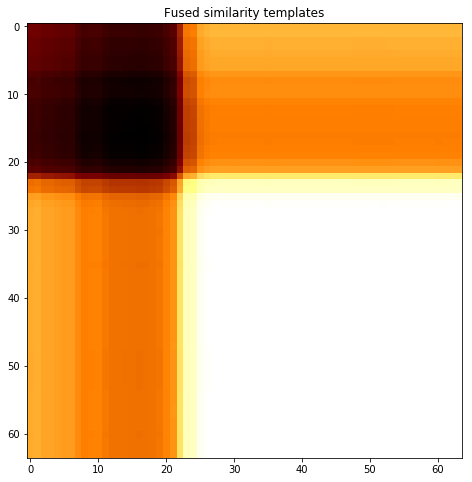

subject 21; gesture 1_1_2


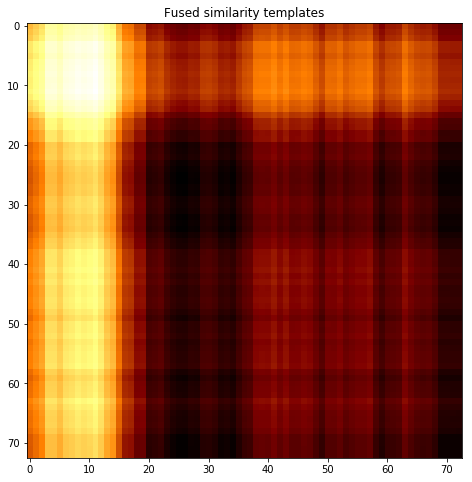

subject 07; gesture 1_0_2


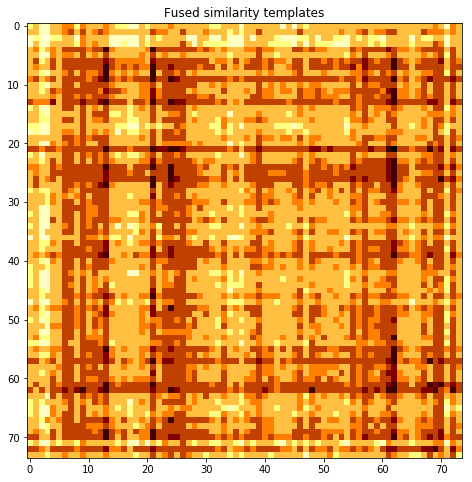

subject 07; gesture 1_0_1


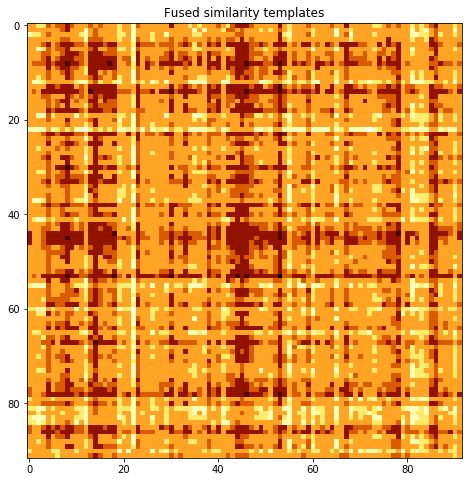

subject 07; gesture 1_1_1


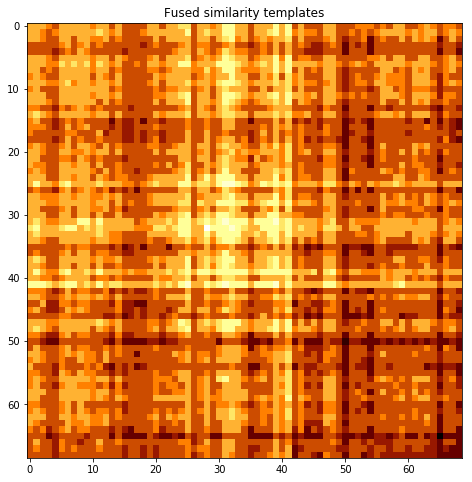

subject 07; gesture 1_1_2


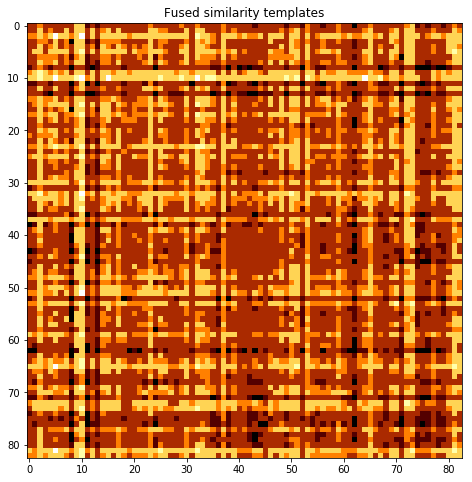

subject 36; gesture 1_0_2


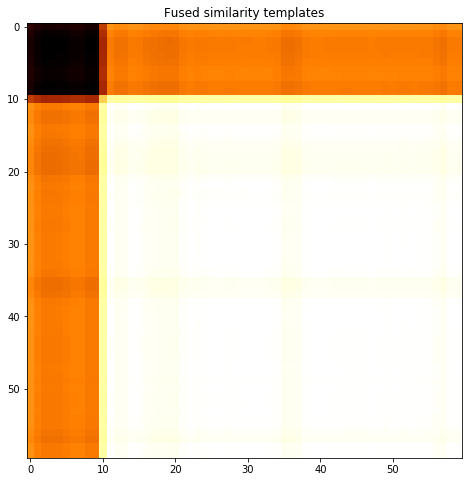

subject 36; gesture 1_0_1


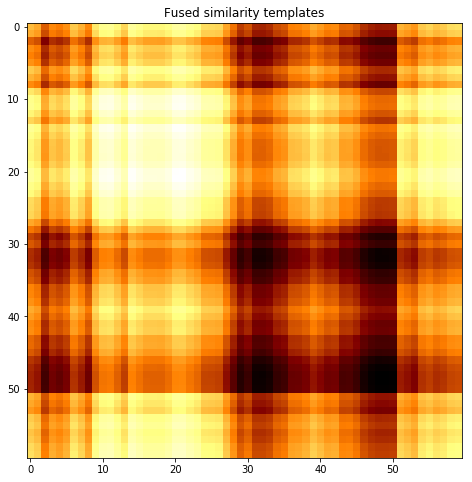

subject 36; gesture 1_1_1


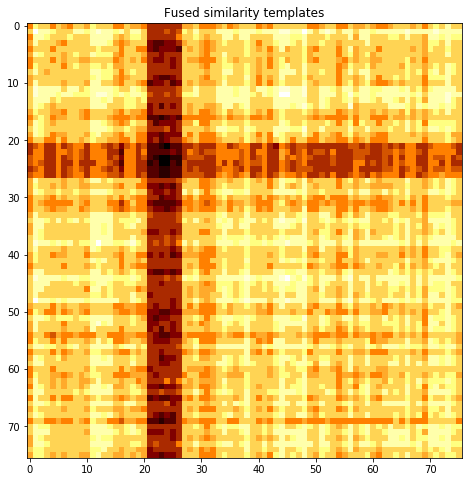

subject 36; gesture 1_1_2


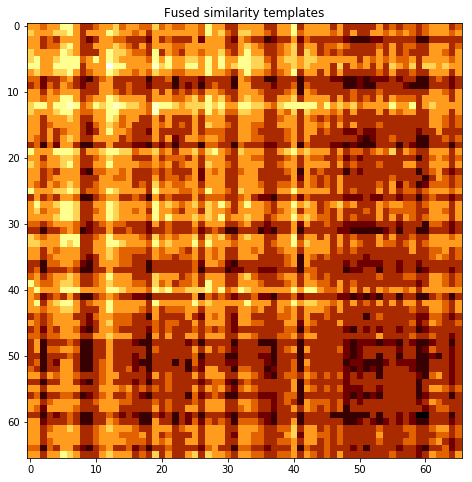

subject 09; gesture 1_0_2


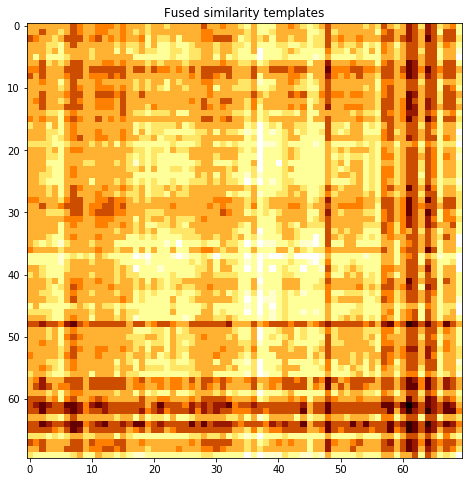

subject 09; gesture 1_0_1


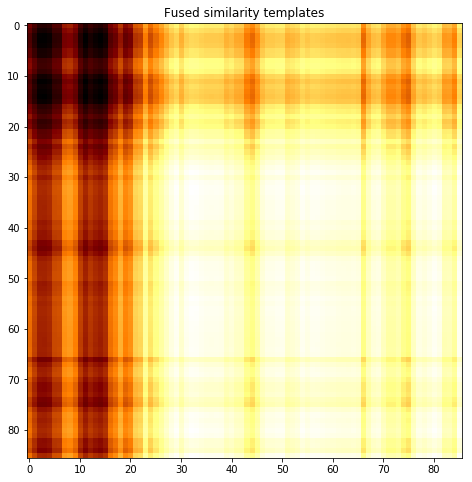

subject 09; gesture 1_1_1


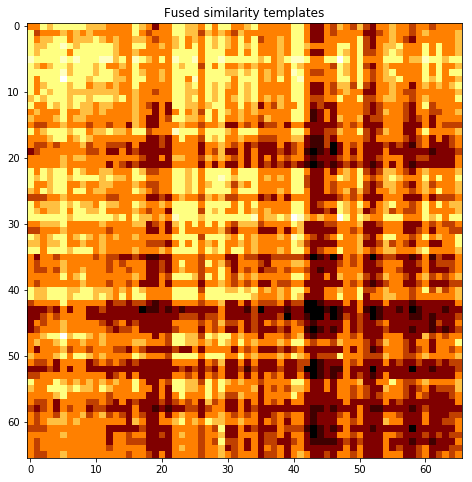

subject 09; gesture 1_1_2


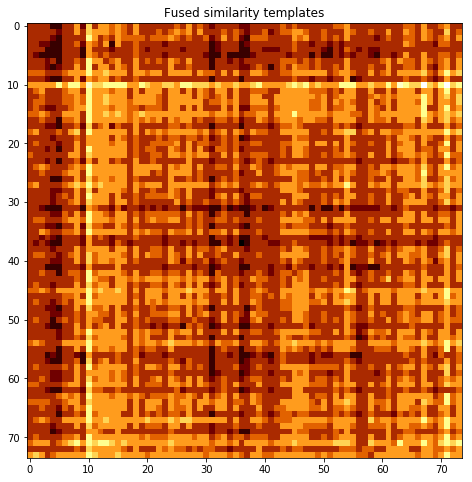

subject 31; gesture 1_0_2


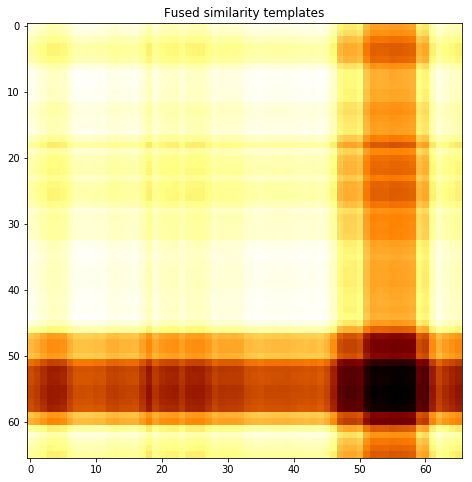

subject 31; gesture 1_0_1


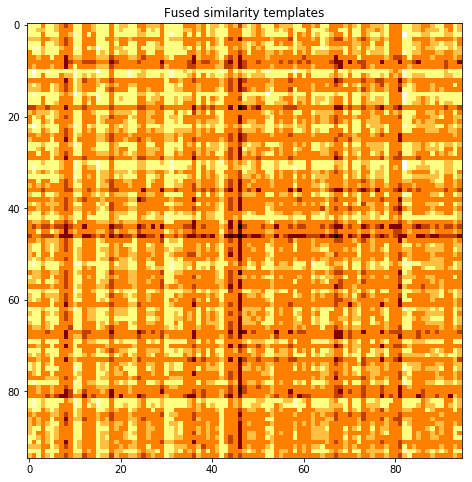

subject 31; gesture 1_1_1


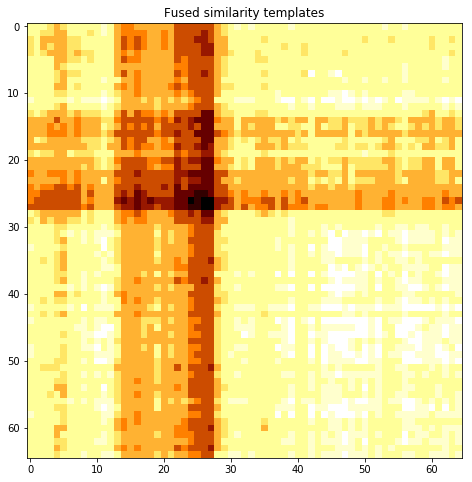

subject 31; gesture 1_1_2


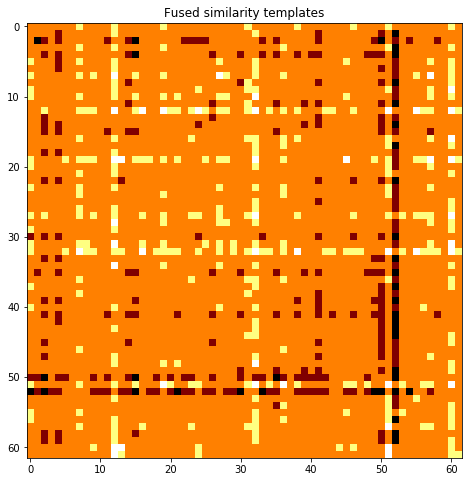

subject 30; gesture 1_0_2


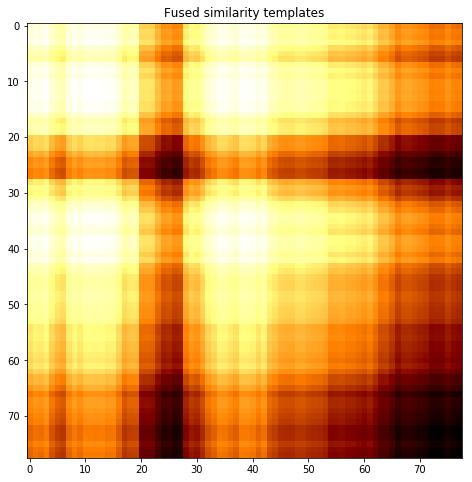

subject 30; gesture 1_0_1


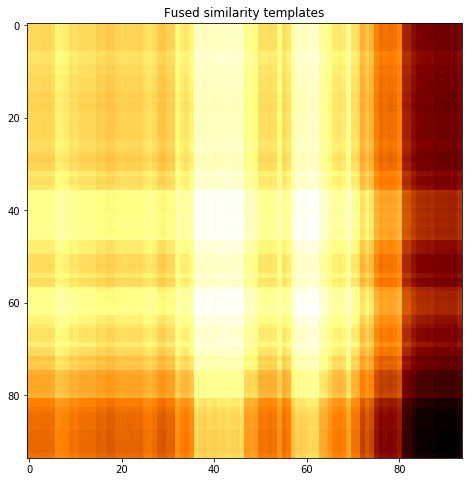

subject 30; gesture 1_1_1


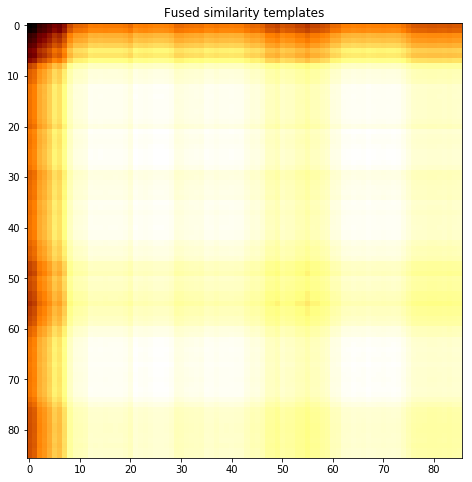

subject 30; gesture 1_1_2


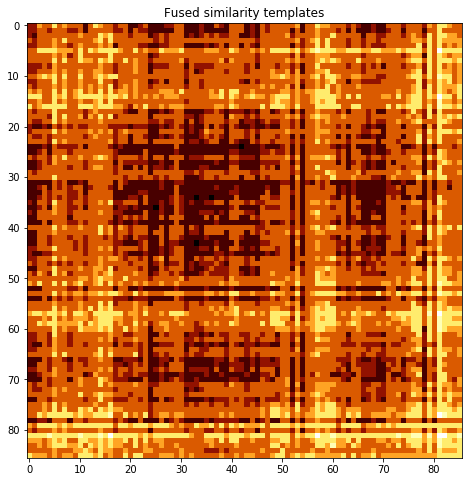

subject 08; gesture 1_0_2


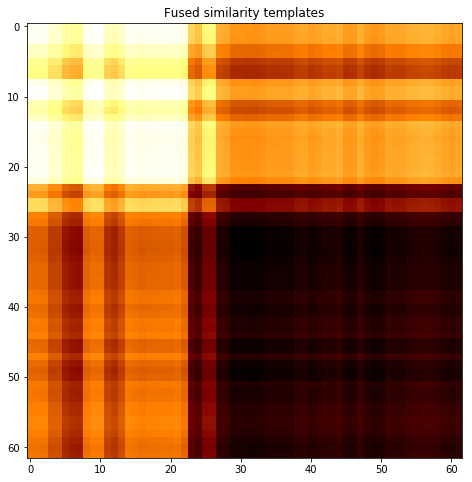

subject 08; gesture 1_0_1


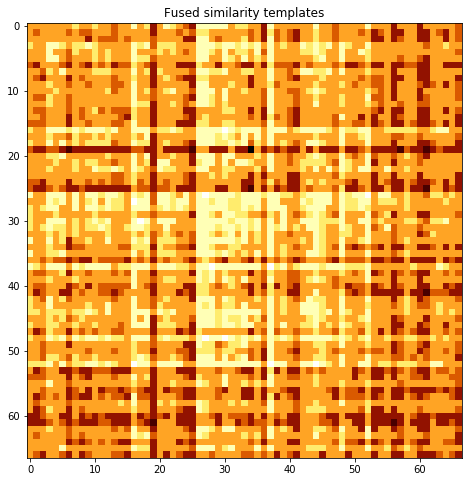

subject 08; gesture 1_1_1


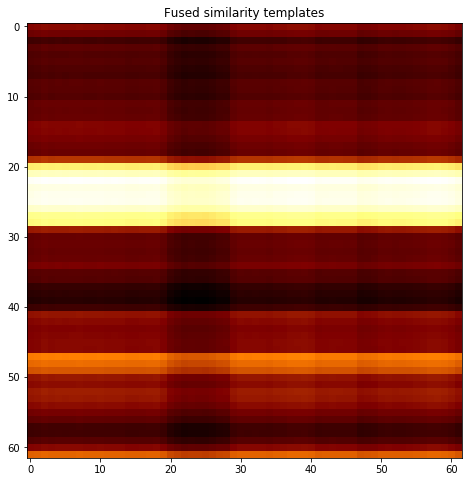

subject 08; gesture 1_1_2


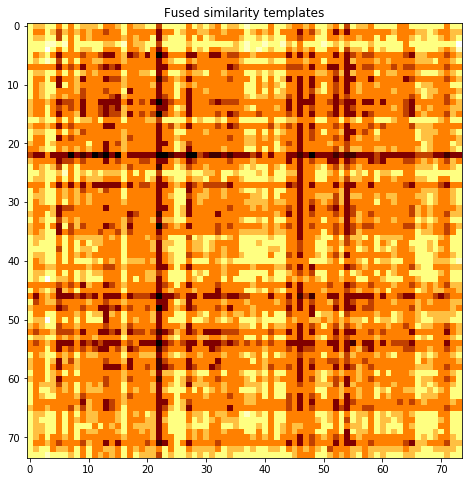

subject 01; gesture 1_0_2


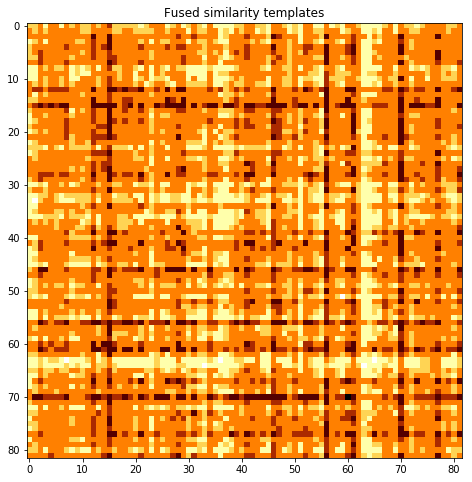

subject 01; gesture 1_0_1


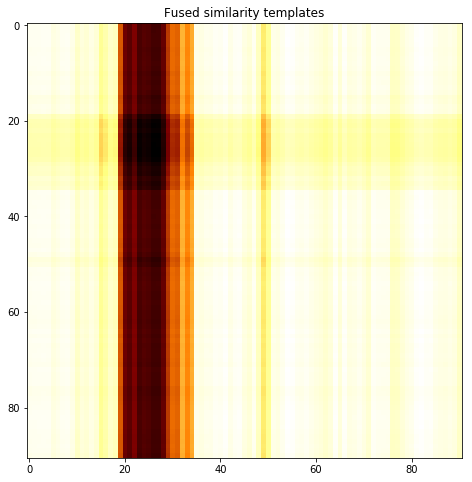

subject 01; gesture 1_1_1


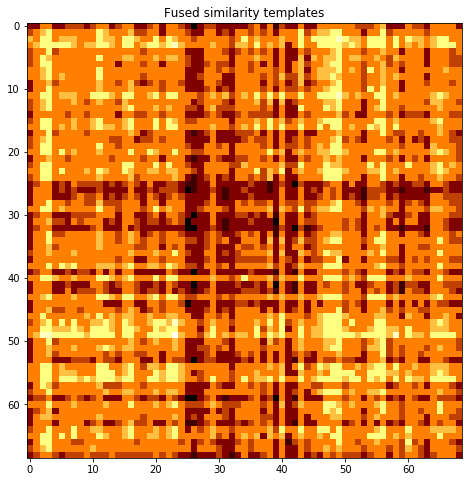

subject 01; gesture 1_1_2


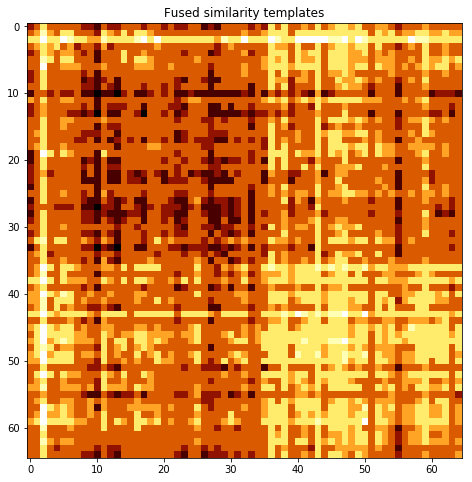

subject 06; gesture 1_0_2


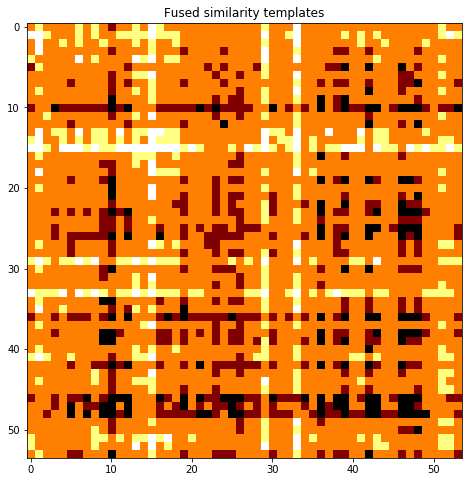

subject 06; gesture 1_0_1


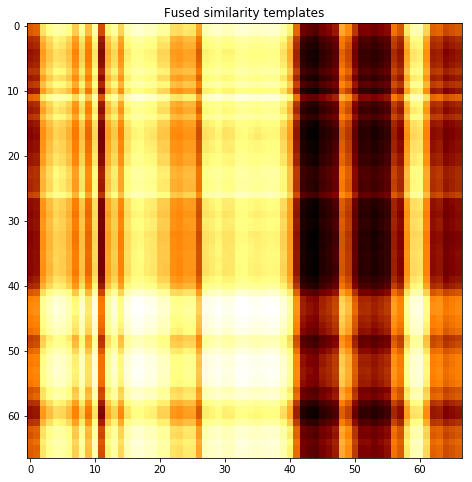

subject 06; gesture 1_1_1


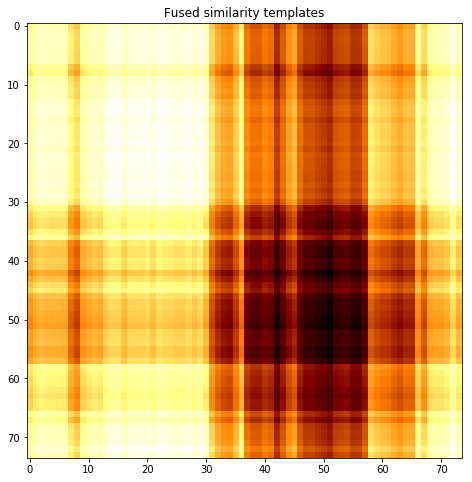

subject 06; gesture 1_1_2


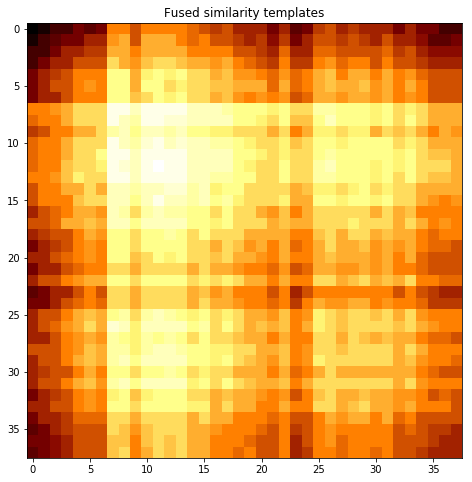

subject 24; gesture 1_0_2


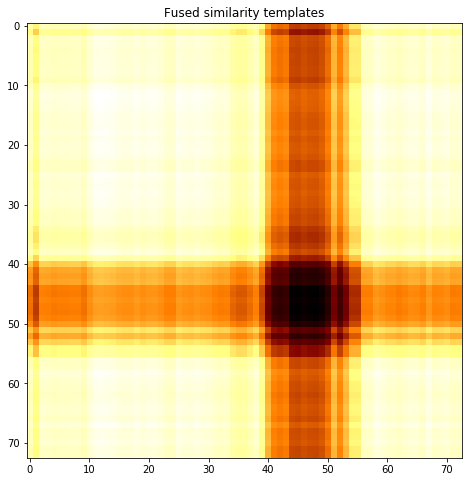

subject 24; gesture 1_0_1


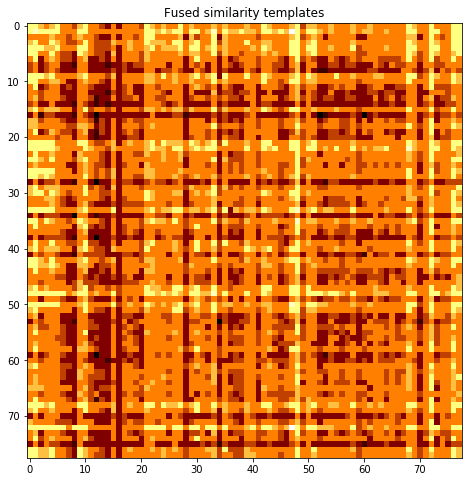

subject 24; gesture 1_1_1


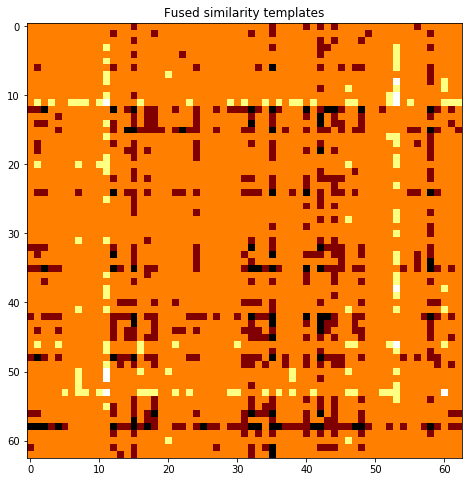

subject 24; gesture 1_1_2


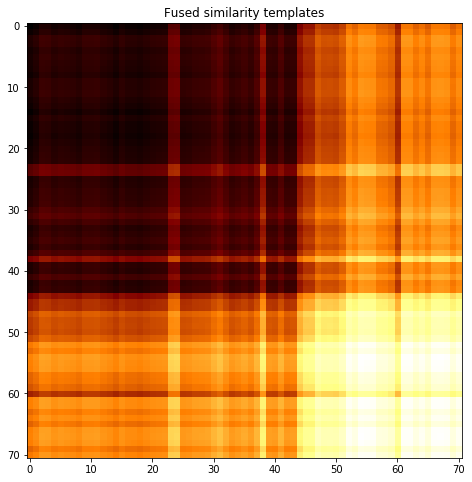

subject 23; gesture 1_0_2


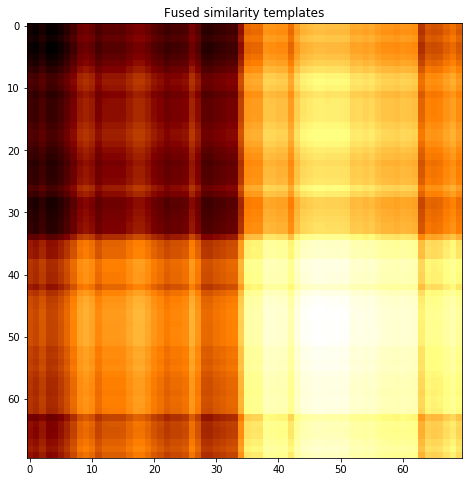

subject 23; gesture 1_0_1


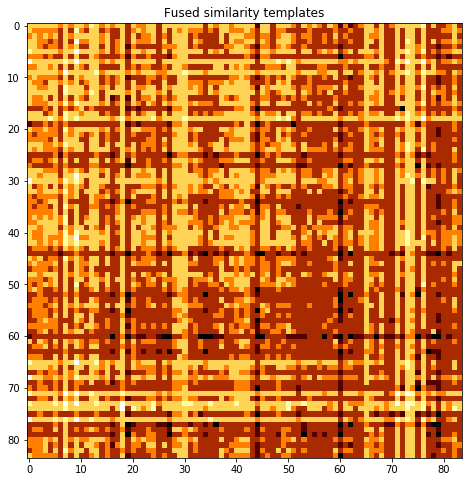

subject 23; gesture 1_1_1


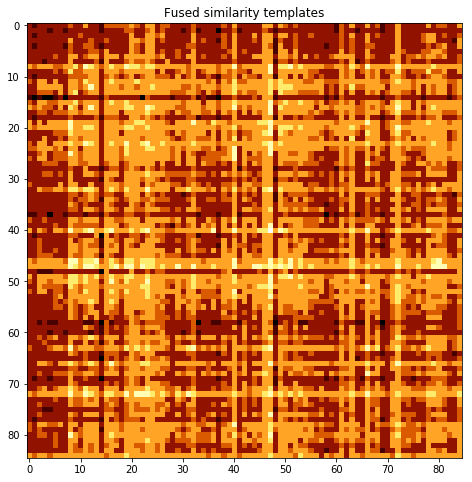

subject 23; gesture 1_1_2


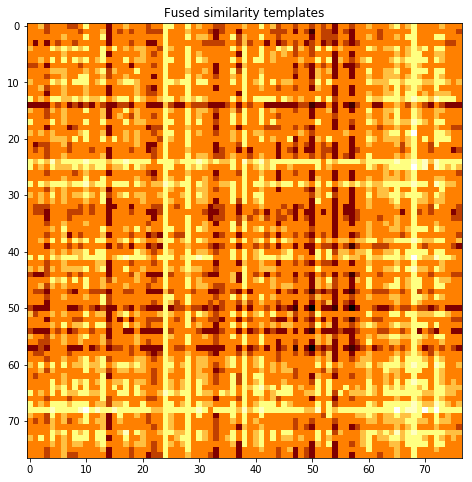

subject 15; gesture 1_0_2


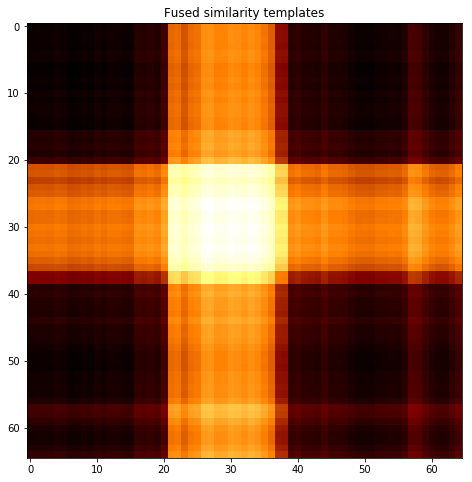

subject 15; gesture 1_0_1


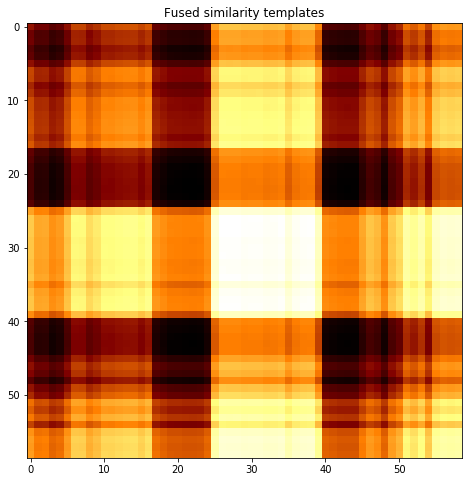

subject 15; gesture 1_1_1


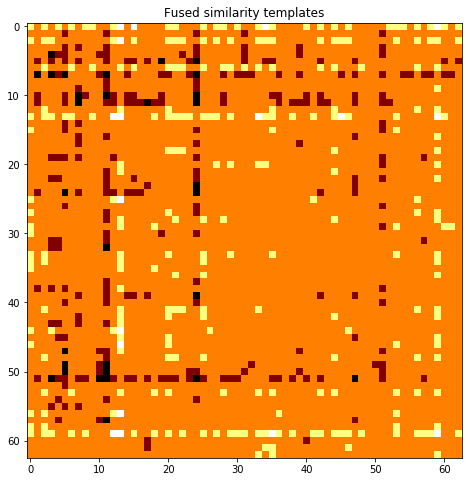

subject 15; gesture 1_1_2


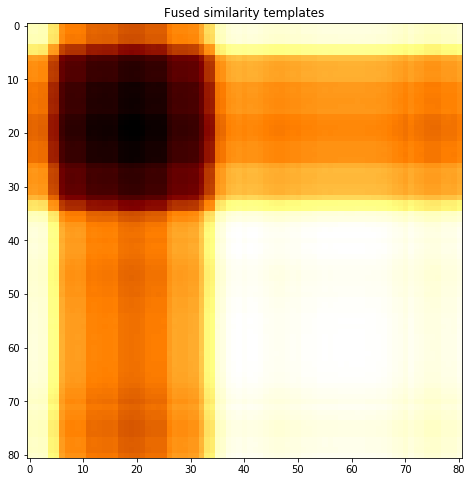

subject 12; gesture 1_0_2


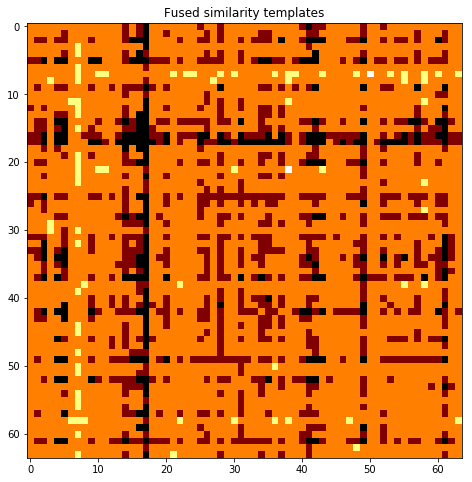

subject 12; gesture 1_0_1


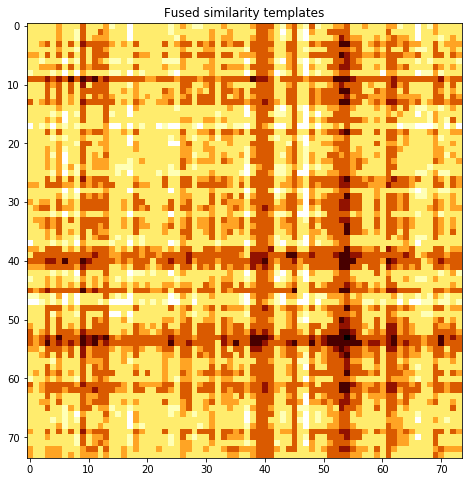

subject 12; gesture 1_1_1


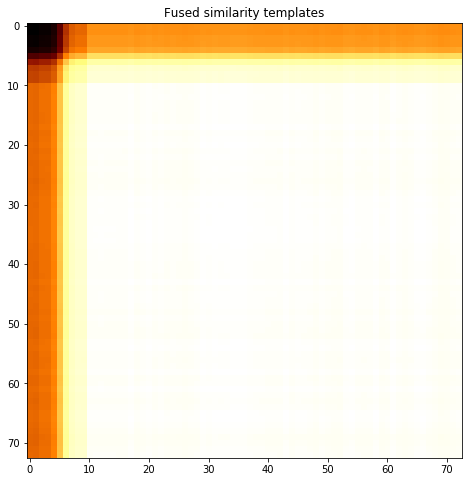

subject 12; gesture 1_1_2


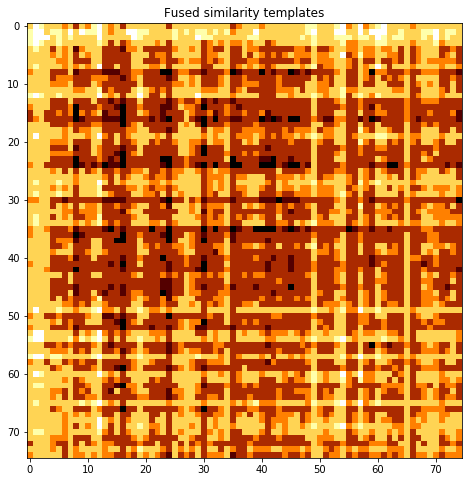

subject 13; gesture 1_0_2


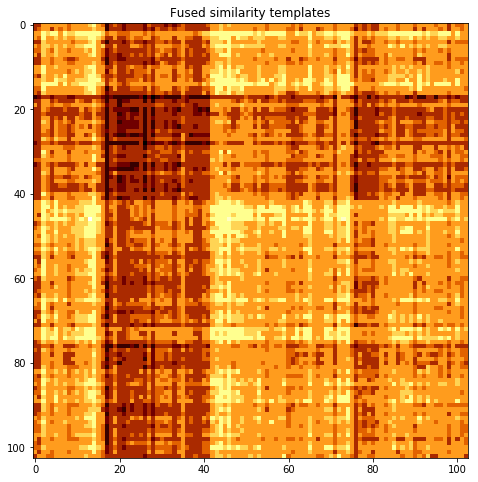

subject 13; gesture 1_0_1


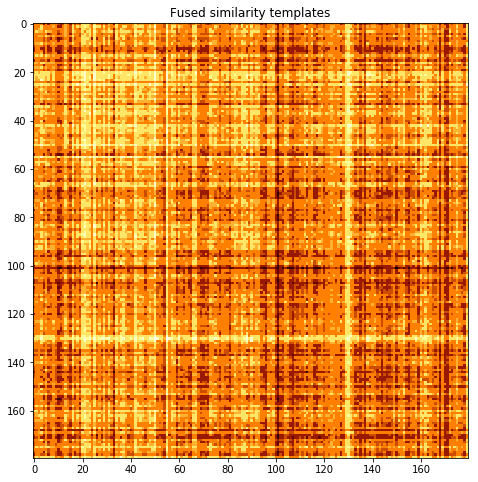

subject 13; gesture 1_1_1


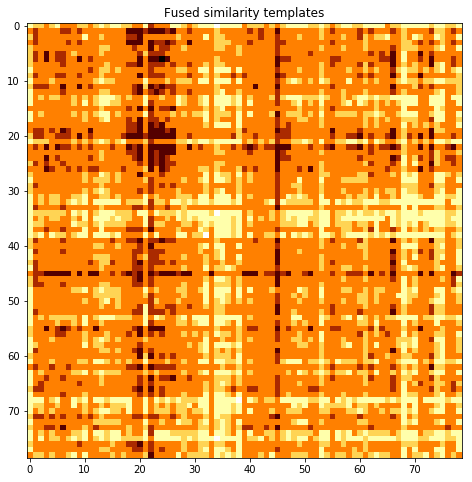

subject 13; gesture 1_1_2


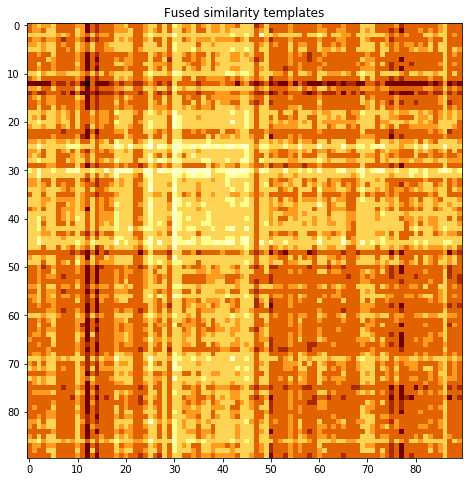

subject 14; gesture 1_0_2


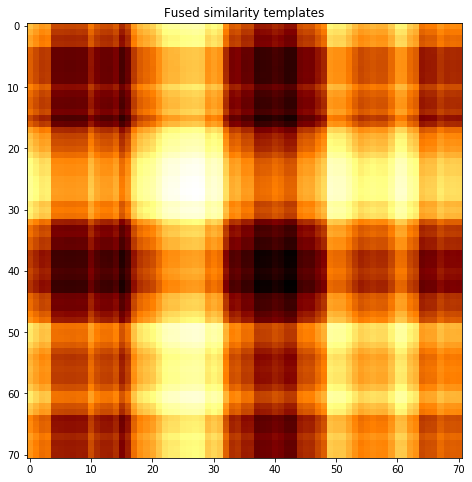

subject 14; gesture 1_0_1


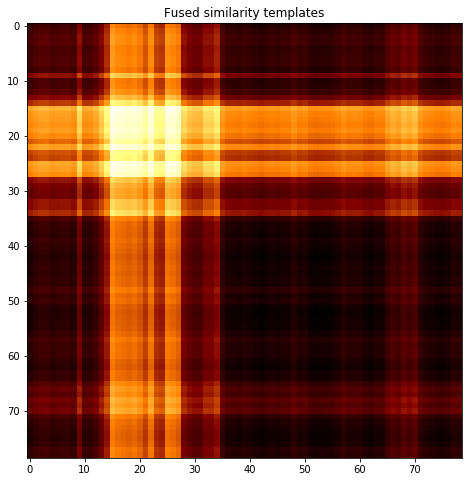

subject 14; gesture 1_1_1


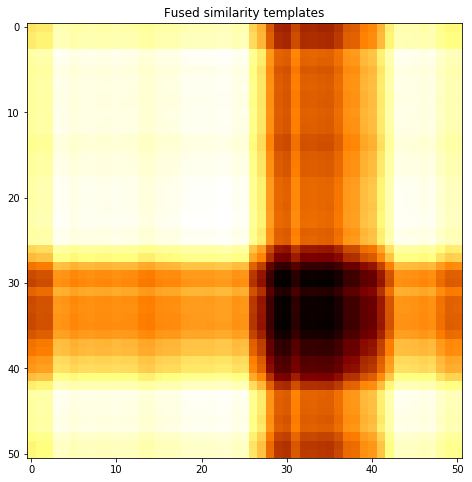

subject 14; gesture 1_1_2


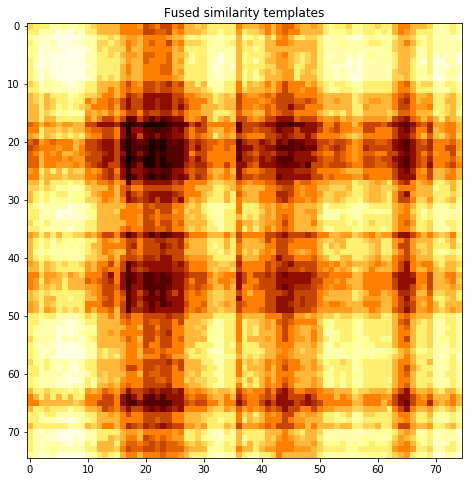

subject 22; gesture 1_0_2


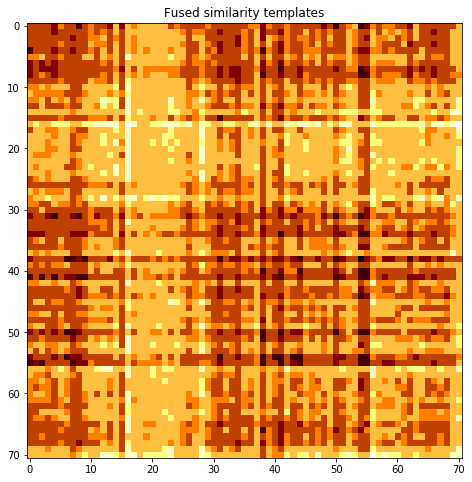

subject 22; gesture 1_0_1


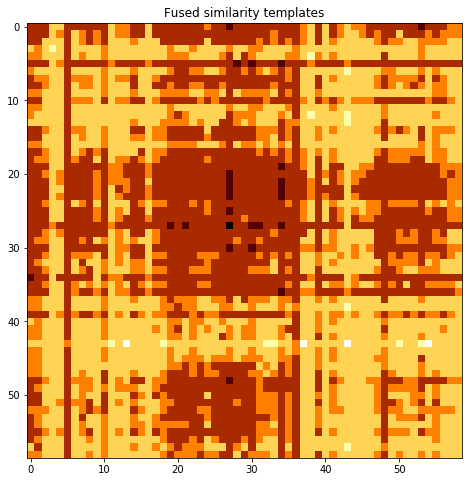

subject 22; gesture 1_1_1


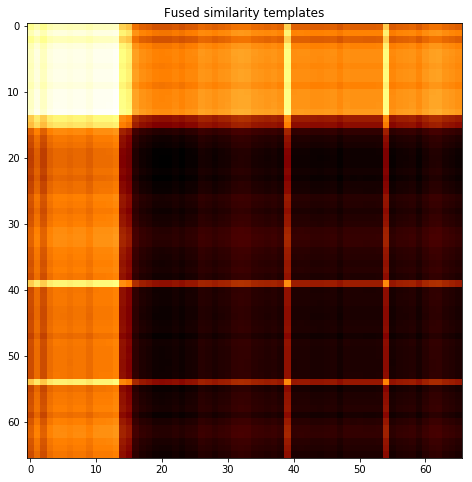

subject 22; gesture 1_1_2


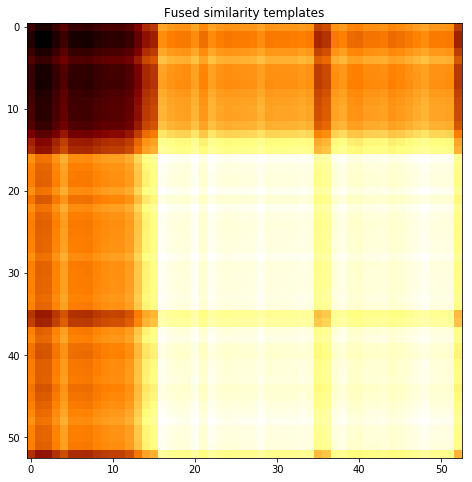

subject 25; gesture 1_0_2


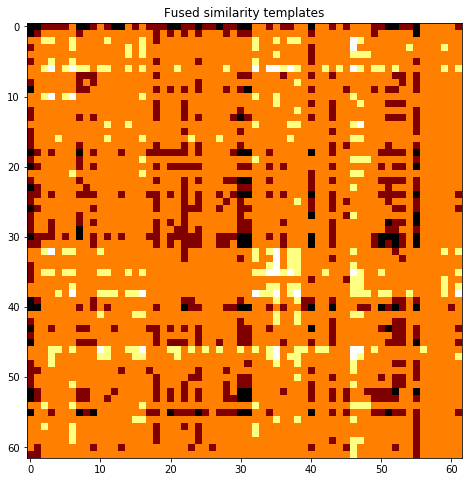

subject 25; gesture 1_0_1


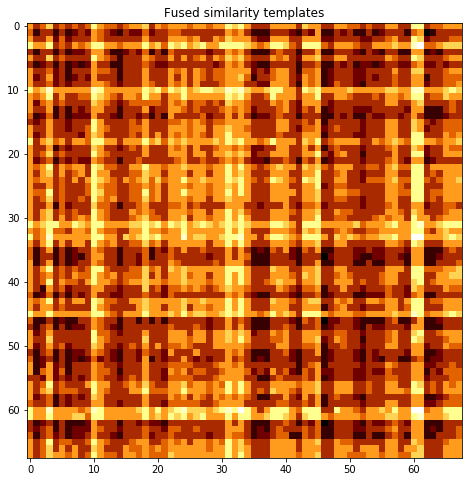

subject 25; gesture 1_1_1


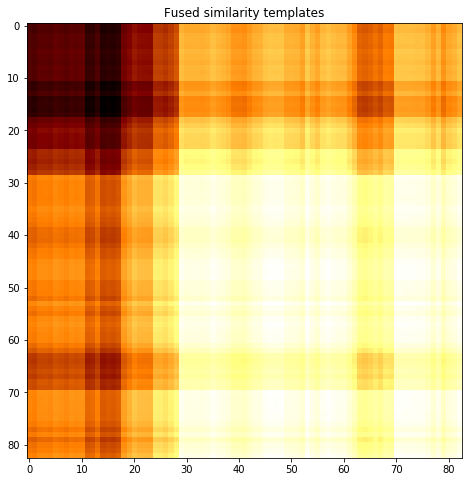

subject 25; gesture 1_1_2


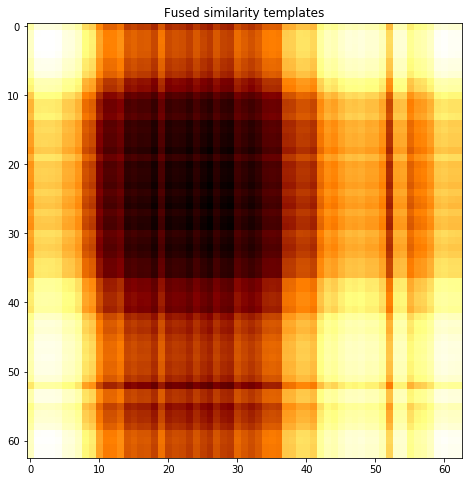

In [3]:
g1_dict_antag = {}
for s, gdict in dc.data_set_smooth.items():
    g1_dict_antag[s] = {}
    for g, a in gdict.items():
        if g[0] != "1": continue # skip gestures not of class 1
        snf = SNF(dc.data_set_smooth[s][g][:, :-1], k=0.2)
        # calculate graph weights to find knn
        snf.calc_weights()
        snf.normalize_weights()
        # generate and normalize knn graphs
        snf.calc_knn_weights()
        snf.normalize_knn_weights()
        # fuse graphs
        snf.network_fusion()
        print(f"subject {s}; gesture {g}")
        snf.plot_template()
        # save template to dict
        g1_dict_antag[s][g] = snf.fused_similarity_template

---

Goal: find differences between "static-y" fused SSMs and "smooth" fused SSMs


Observations:
 - SSMs with a lot of static have very low st. dev.; All elements very similar.
 - SSMs with higher st. dev. have more obvious/ bold features.
 - some exceptions exist (e.g. subject 02 gesture 1_1_1 - still a lot of static but a bold feature exists)


Does each fused ssm provide a realization?

In [4]:
for s, gdict in g1_dict_antag.items():
    print(s)
    for g, a in gdict.items():
        print(f"gesture {g}; avg {a.mean()}; sd {a.std()}")

03
gesture 1_0_2; avg 0.016284309044011923; sd 7.139051944085317e-12
gesture 1_0_1; avg 0.014111405390990048; sd 4.0942559908313423e-14
gesture 1_1_1; avg 0.018547257696361983; sd 4.617845946083376e-18
gesture 1_1_2; avg 0.013220300490531127; sd 2.5857156302226666e-18
04
gesture 1_0_2; avg 0.01593598002120581; sd 4.6244114195575705e-18
gesture 1_0_1; avg 0.01723985130487499; sd 4.226953503548298e-18
gesture 1_1_1; avg 0.014552552123474395; sd 1.077994451441785e-17
gesture 1_1_2; avg 0.013712663663495304; sd 1.675252778909515e-17
32
gesture 1_0_2; avg 0.017498841200385043; sd 1.92348360280115e-07
gesture 1_0_1; avg 0.014385329129749082; sd 1.0821836810421447e-16
gesture 1_1_1; avg 0.01480003899913129; sd 2.615680383234126e-18
gesture 1_1_2; avg 0.013018484677778048; sd 6.396898343708127e-15
35
gesture 1_0_2; avg 0.012704863392957946; sd 2.6903450068360308e-18
gesture 1_0_1; avg 0.014942606762848568; sd 9.762178665757695e-12
gesture 1_1_1; avg 0.017838437526123536; sd 3.482168860278118e-

In [17]:
evals = evals.real

In [19]:
evals.sort()

In [28]:
evals[np.argsort(-evals)]

array([ 1.02591147e+00,  6.33105328e-17,  5.25359102e-17,  5.25359102e-17,
        3.32987334e-17,  3.32987334e-17,  2.99126114e-17,  2.78697232e-17,
        2.78697232e-17,  2.53815573e-17,  2.53815573e-17,  2.25294315e-17,
        2.25294315e-17,  1.91061355e-17,  1.91061355e-17,  1.75809457e-17,
        1.75809457e-17,  1.50642902e-17,  1.50642902e-17,  1.09122622e-17,
        7.49148858e-18,  7.49148858e-18,  7.08767669e-18,  7.08767669e-18,
        5.27577531e-18,  5.27577531e-18,  2.36562578e-18,  2.36562578e-18,
        1.18462734e-18,  1.18462734e-18,  7.57174454e-19,  7.57174454e-19,
        0.00000000e+00, -5.22463609e-19, -5.22463609e-19, -1.79460911e-18,
       -1.79460911e-18, -2.07906253e-18, -2.07906253e-18, -9.48538431e-18,
       -1.15764289e-17, -1.15764289e-17, -1.17274258e-17, -1.17274258e-17,
       -1.55964521e-17, -1.63340444e-17, -1.63340444e-17, -1.88333340e-17,
       -1.88333340e-17, -1.96991937e-17, -1.96991937e-17, -2.19307613e-17,
       -2.19307613e-17, -

---
Can I do PCA for all of these and get similar results?

03
gesture 1_0_2; avg 0.016284309044011923; sd 7.139051944085317e-12
gesture 1_0_2; PoV: 0.9999999999999998


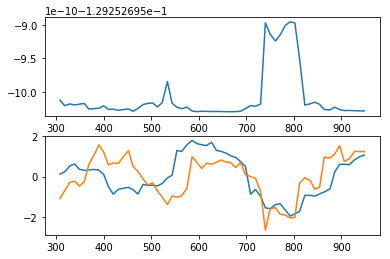

gesture 1_0_1; avg 0.014111405390990048; sd 4.0942559908313423e-14
gesture 1_0_1; PoV: 1.0


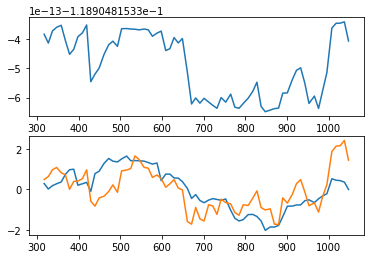

gesture 1_1_1; avg 0.018547257696361983; sd 4.617845946083376e-18
gesture 1_1_1; PoV: 1.0


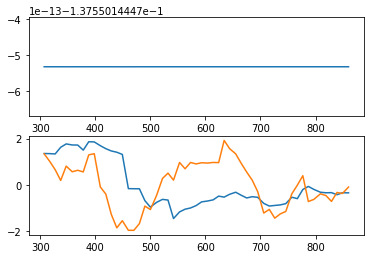

gesture 1_1_2; avg 0.013220300490531127; sd 2.5857156302226666e-18
gesture 1_1_2; PoV: 1.0


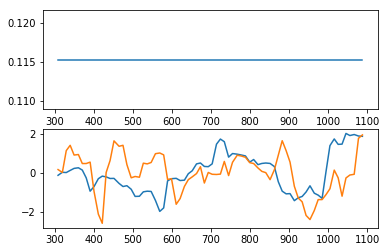

04
gesture 1_0_2; avg 0.01593598002120581; sd 4.6244114195575705e-18
gesture 1_0_2; PoV: 0.9999999999999998


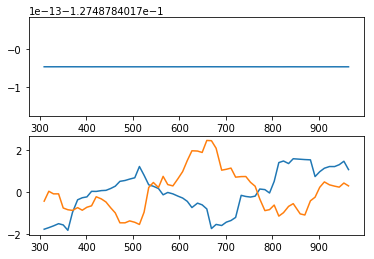

gesture 1_0_1; avg 0.01723985130487499; sd 4.226953503548298e-18
gesture 1_0_1; PoV: 0.9999999999999998


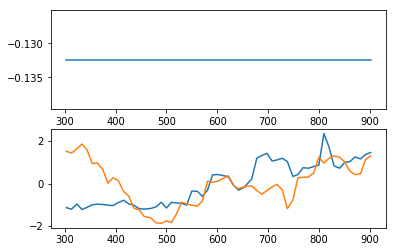

gesture 1_1_1; avg 0.014552552123474395; sd 1.077994451441785e-17
gesture 1_1_1; PoV: 0.9999999999999998


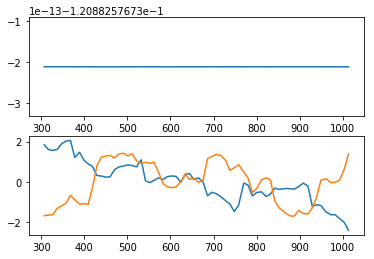

gesture 1_1_2; avg 0.013712663663495304; sd 1.675252778909515e-17
gesture 1_1_2; PoV: 1.0


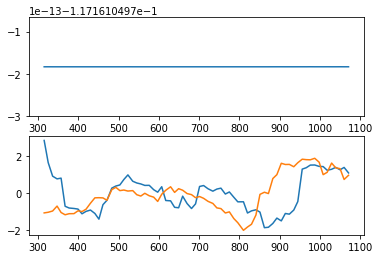

32
gesture 1_0_2; avg 0.017498841200385043; sd 1.92348360280115e-07
gesture 1_0_2; PoV: 0.999999998054883


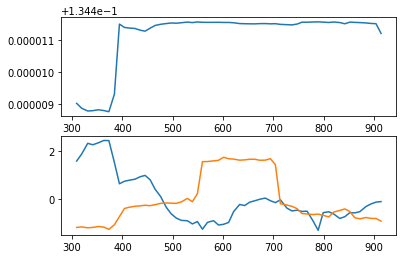

gesture 1_0_1; avg 0.014385329129749082; sd 1.0821836810421447e-16
gesture 1_0_1; PoV: 0.9999999999999998


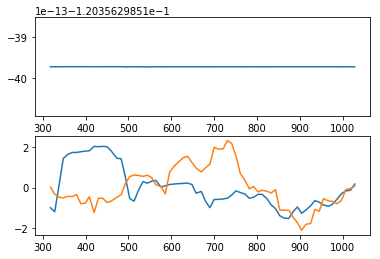

gesture 1_1_1; avg 0.01480003899913129; sd 2.615680383234126e-18
gesture 1_1_1; PoV: 1.0


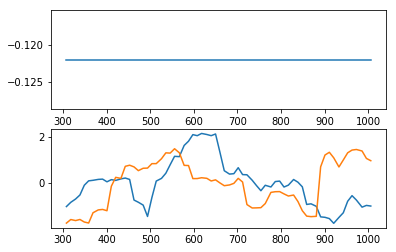

gesture 1_1_2; avg 0.013018484677778048; sd 6.396898343708127e-15
gesture 1_1_2; PoV: 1.0


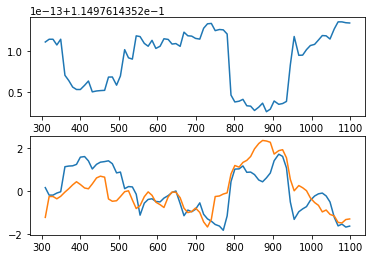

35
gesture 1_0_2; avg 0.012704863392957946; sd 2.6903450068360308e-18
gesture 1_0_2; PoV: 1.0


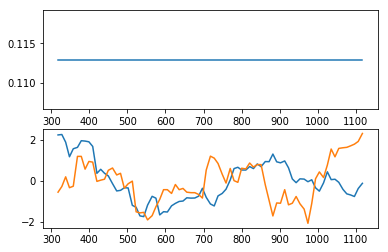

gesture 1_0_1; avg 0.014942606762848568; sd 9.762178665757695e-12
gesture 1_0_1; PoV: 1.0


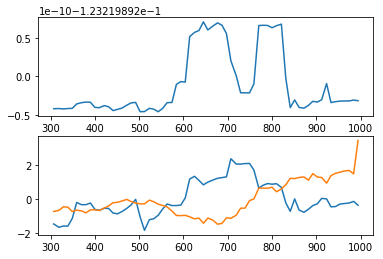

gesture 1_1_1; avg 0.017838437526123536; sd 3.482168860278118e-10
gesture 1_1_1; PoV: 0.9999999999999623


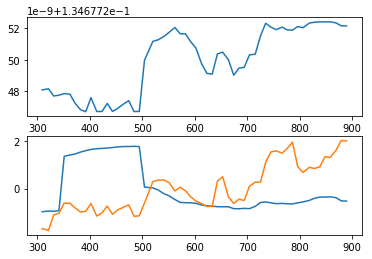

gesture 1_1_2; avg 0.013718025904054486; sd 2.1338849508195788e-18
gesture 1_1_2; PoV: 1.0


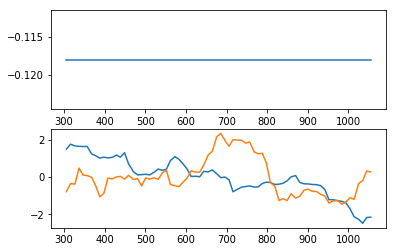

34
gesture 1_0_2; avg 0.012995969312092627; sd 3.016514744217663e-18
gesture 1_0_2; PoV: 1.0


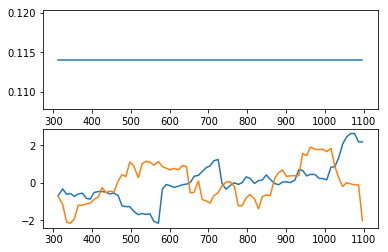

gesture 1_0_1; avg 0.012574969791644361; sd 2.1714379889875647e-18
gesture 1_0_1; PoV: 0.9999999999999998


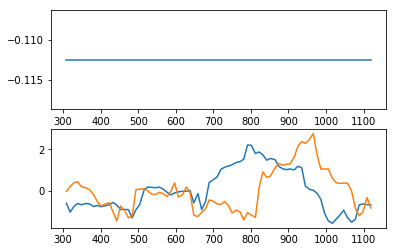

gesture 1_1_1; avg 0.010624002145622619; sd 1.839678890172047e-17
gesture 1_1_1; PoV: 1.0


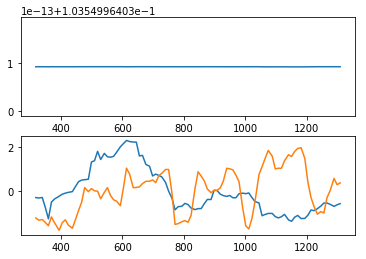

gesture 1_1_2; avg 0.015160480190376751; sd 2.6177212073788768e-18
gesture 1_1_2; PoV: 1.0


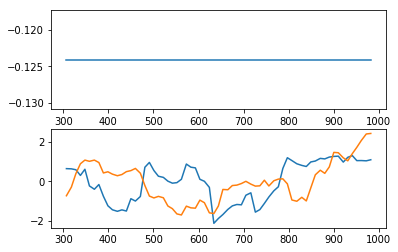

33
gesture 1_0_2; avg 0.01352656703078925; sd 1.9839159225720575e-17
gesture 1_0_2; PoV: 1.0


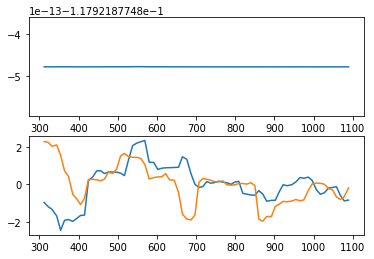

gesture 1_0_1; avg 0.014498371900047559; sd 2.5491510655185994e-18
gesture 1_0_1; PoV: 1.0


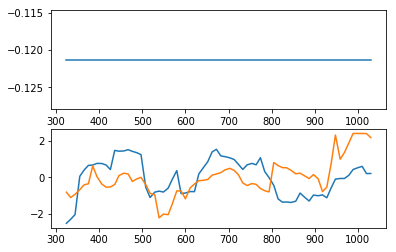

gesture 1_1_1; avg 0.013302934780435767; sd 2.2708775871673095e-13
gesture 1_1_1; PoV: 0.9999999999999998


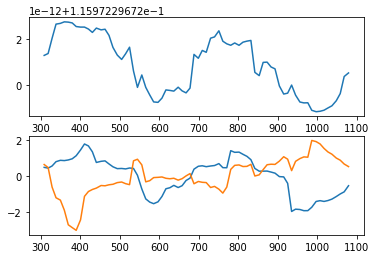

gesture 1_1_2; avg 0.013584038100461738; sd 3.44542023272633e-17
gesture 1_1_2; PoV: 0.9999999999999998


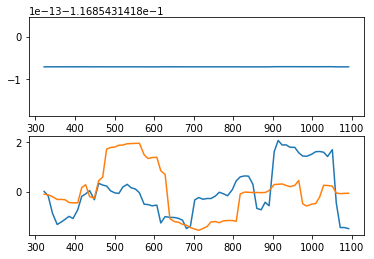

05
gesture 1_0_2; avg 0.014747941532958778; sd 2.976885028124141e-18
gesture 1_0_2; PoV: 0.9999999999999998


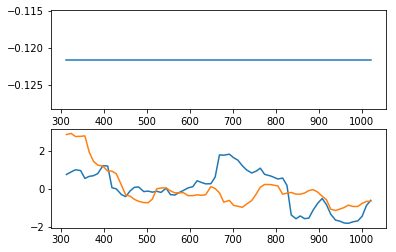

gesture 1_0_1; avg 0.011448537334307535; sd 1.6462225834495718e-18
gesture 1_0_1; PoV: 1.0


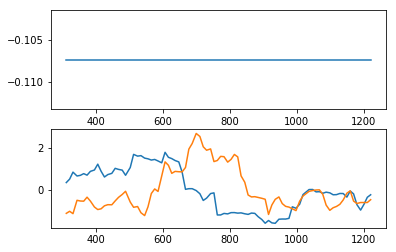

gesture 1_1_1; avg 0.018082627206361584; sd 2.789324868423505e-18
gesture 1_1_1; PoV: 1.0


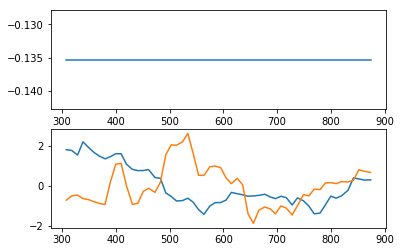

gesture 1_1_2; avg 0.01796293156036823; sd 3.481110148333041e-08
gesture 1_1_2; PoV: 0.9999999993407873


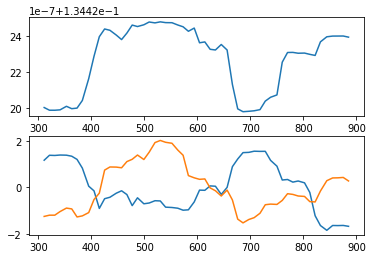

02
gesture 1_0_2; avg 0.01328915399369397; sd 5.5312552723720634e-17
gesture 1_0_2; PoV: 1.0


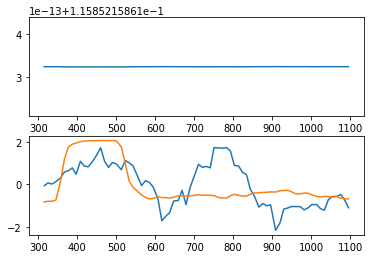

gesture 1_0_1; avg 0.015760329486224692; sd 5.641127923487037e-09
gesture 1_0_1; PoV: 0.9999999999074448


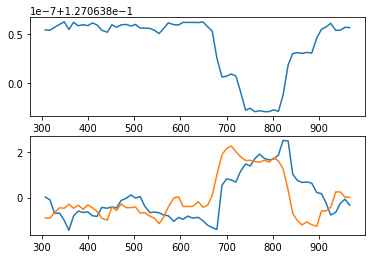

gesture 1_1_1; avg 0.011929369969280902; sd 4.521671411192546e-18
gesture 1_1_1; PoV: 1.0


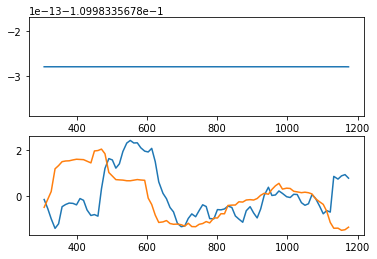

gesture 1_1_2; avg 0.013759423747469014; sd 2.6018165414374886e-13
gesture 1_1_2; PoV: 1.0000000000000002


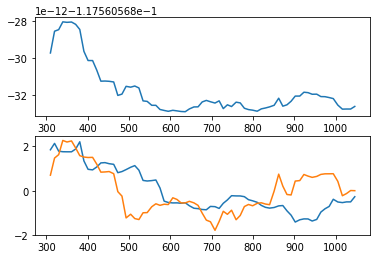

20
gesture 1_0_2; avg 0.00979654979872541; sd 7.820874303315734e-15
gesture 1_0_2; PoV: 0.9999999999999998


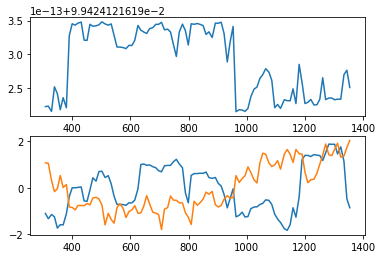

gesture 1_0_1; avg 0.012658520104114989; sd 1.9377076412441787e-18
gesture 1_0_1; PoV: 1.0


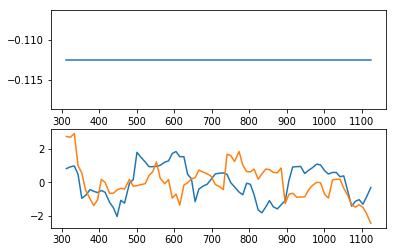

gesture 1_1_1; avg 0.012445215925562405; sd 1.0051790617200654e-14
gesture 1_1_1; PoV: 1.0


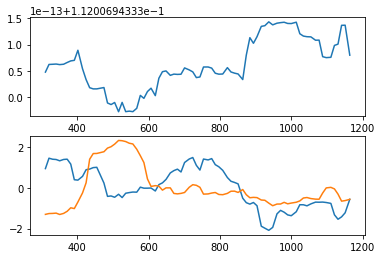

gesture 1_1_2; avg 0.01322655477249976; sd 1.6542961456001826e-16
gesture 1_1_2; PoV: 1.0


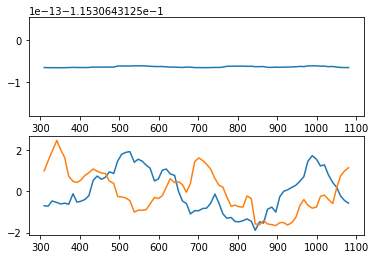

18
gesture 1_0_2; avg 0.012675578449932912; sd 3.1923758088475547e-12
gesture 1_0_2; PoV: 0.9999999999999996


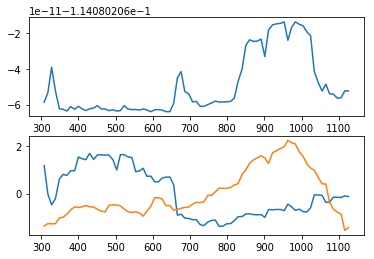

gesture 1_0_1; avg 0.019372260553636056; sd 2.3268627596871077e-12
gesture 1_0_1; PoV: 0.9999999999999998


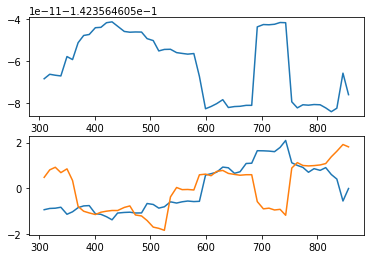

gesture 1_1_1; avg 0.013174209154114352; sd 3.2618669907000763e-18
gesture 1_1_1; PoV: 1.0


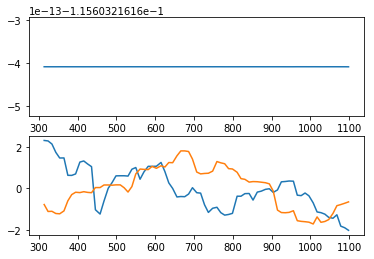

gesture 1_1_2; avg 0.012602896468800685; sd 1.6580850966410517e-18
gesture 1_1_2; PoV: 1.0


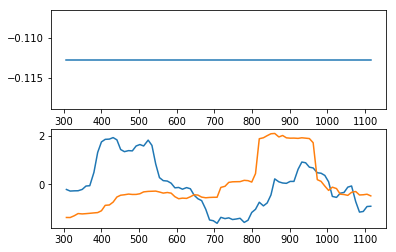

27
gesture 1_0_2; avg 0.015490685010228725; sd 2.0976877941004182e-18
gesture 1_0_2; PoV: 1.0


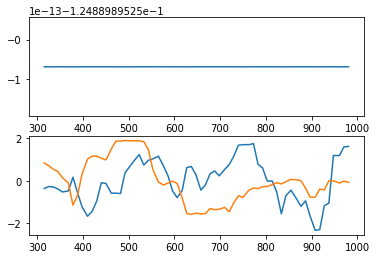

gesture 1_0_1; avg 0.01456650981790793; sd 6.695625502095137e-17
gesture 1_0_1; PoV: 1.0


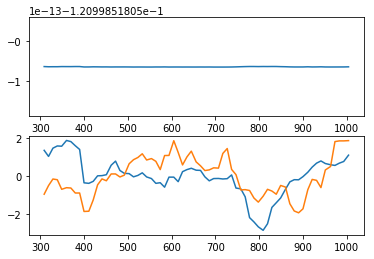

gesture 1_1_1; avg 0.010452958593768229; sd 1.8056478594922763e-18
gesture 1_1_1; PoV: 1.0


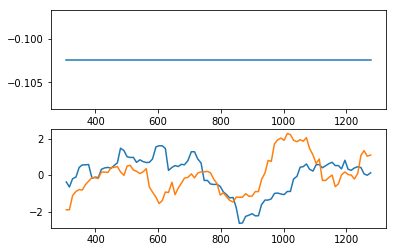

gesture 1_1_2; avg 0.014379899878244881; sd 1.0184965294934364e-14
gesture 1_1_2; PoV: 0.9999999999999993


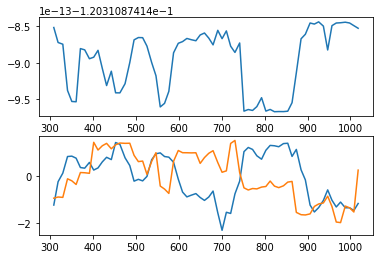

11
gesture 1_0_2; avg 0.014316574476520016; sd 2.651597995873463e-18
gesture 1_0_2; PoV: 1.0


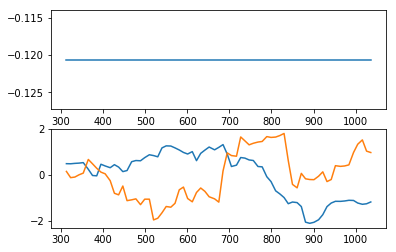

gesture 1_0_1; avg 0.01195013836847423; sd 1.6508263747158224e-18
gesture 1_0_1; PoV: 1.0


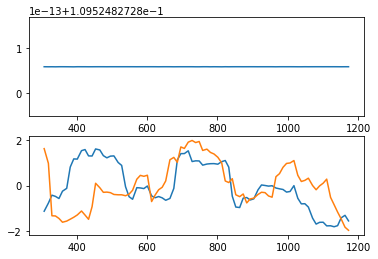

gesture 1_1_1; avg 0.011397444223087552; sd 2.9860124536624485e-18
gesture 1_1_1; PoV: 1.0


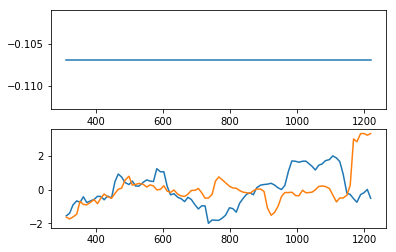

gesture 1_1_2; avg 0.01269716018680465; sd 1.7983214219265543e-18
gesture 1_1_2; PoV: 1.0


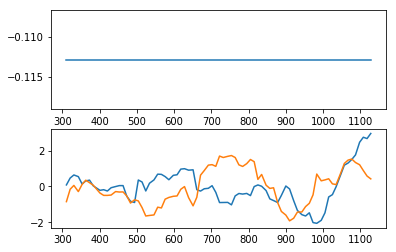

29
gesture 1_0_2; avg 0.01481307103860184; sd 2.688080515952418e-18
gesture 1_0_2; PoV: 1.0


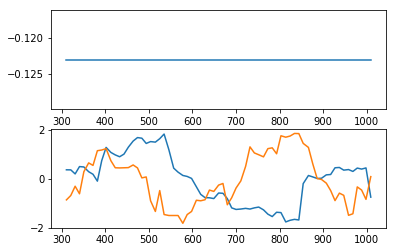

gesture 1_0_1; avg 0.015450573467256439; sd 4.10368403679071e-18
gesture 1_0_1; PoV: 0.9999999999999998


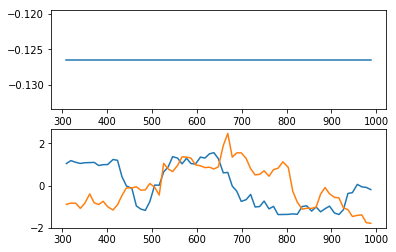

gesture 1_1_1; avg 0.01786370957561344; sd 4.4992723969545935e-18
gesture 1_1_1; PoV: 1.0


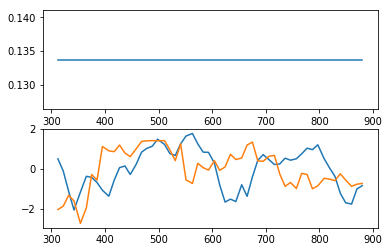

gesture 1_1_2; avg 0.015495764943559746; sd 1.5999312443505565e-16
gesture 1_1_2; PoV: 1.0000000000000002


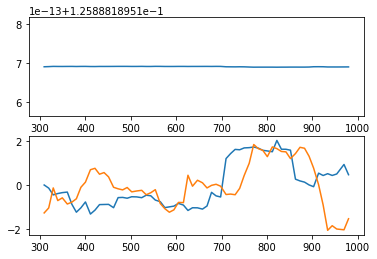

16
gesture 1_0_2; avg 0.018493520544512566; sd 1.9587273656118755e-10
gesture 1_0_2; PoV: 0.9999999999999919


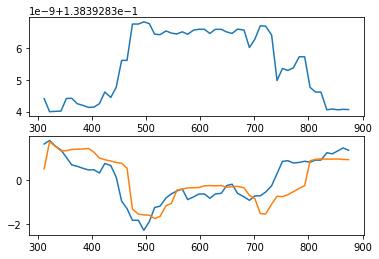

gesture 1_0_1; avg 0.022342381731253375; sd 2.7931869305354457e-07
gesture 1_0_1; PoV: 0.9999999971506037


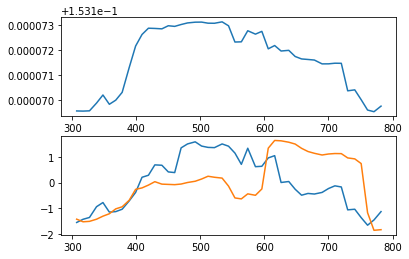

gesture 1_1_1; avg 0.013618419339480195; sd 1.1397082478177304e-08
gesture 1_1_1; PoV: 0.9999999983570571


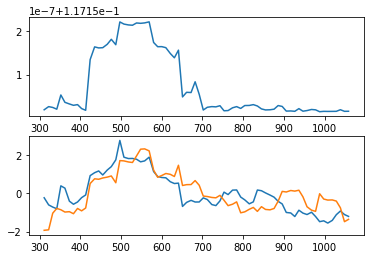

gesture 1_1_2; avg 0.01972670180256786; sd 1.2427944713827127e-12
gesture 1_1_2; PoV: 0.9999999999999998


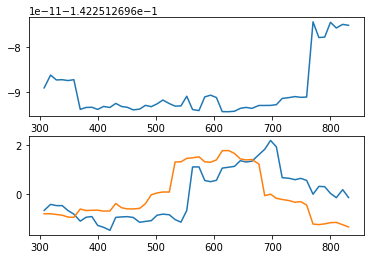

28
gesture 1_0_2; avg 0.01669287546580423; sd 1.4616239181363626e-17
gesture 1_0_2; PoV: 1.0


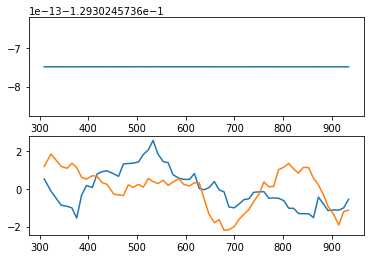

gesture 1_0_1; avg 0.01880310890310041; sd 4.4545106631877444e-11
gesture 1_0_1; PoV: 0.9999999999999991


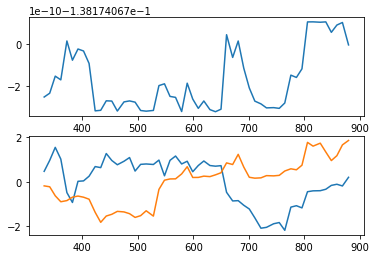

gesture 1_1_1; avg 0.02476386952025895; sd 1.722698452641833e-12
gesture 1_1_1; PoV: 1.0


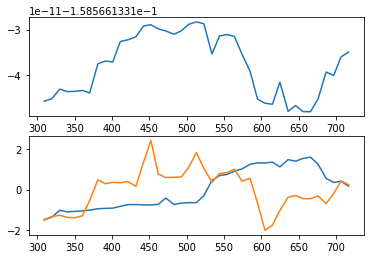

gesture 1_1_2; avg 0.02062113206339933; sd 2.3324210030857404e-13
gesture 1_1_2; PoV: 1.0


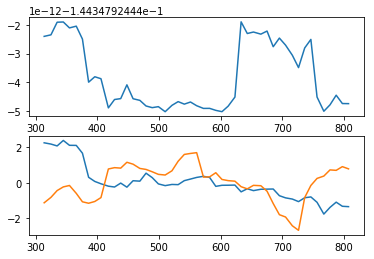

17
gesture 1_0_2; avg 0.01649893956139323; sd 2.0711734505477004e-05
gesture 1_0_2; PoV: 0.9998430267833525


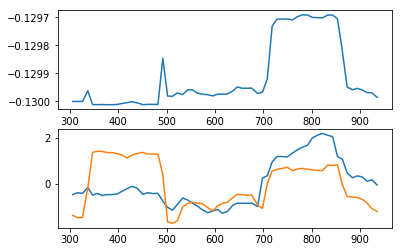

gesture 1_0_1; avg 0.014136676949107198; sd 1.5071586774017014e-14
gesture 1_0_1; PoV: 0.9999999999999998


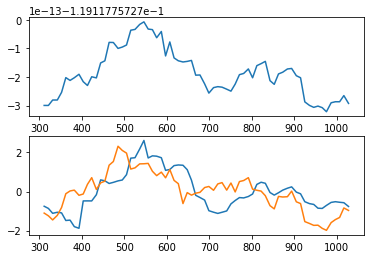

gesture 1_1_1; avg 0.01598497576609634; sd 4.394273935202641e-18
gesture 1_1_1; PoV: 0.9999999999999998


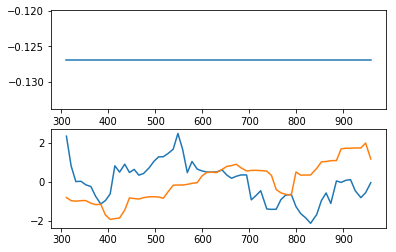

gesture 1_1_2; avg 0.01338470265391089; sd 2.340321604790124e-12
gesture 1_1_2; PoV: 0.999999999999998


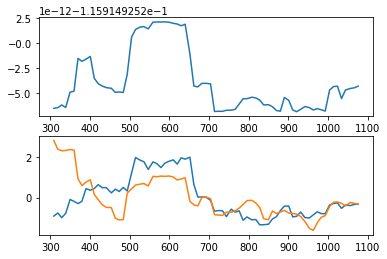

10
gesture 1_0_2; avg 0.014388638928534423; sd 1.3721657167617138e-11
gesture 1_0_2; PoV: 0.9999999999999286


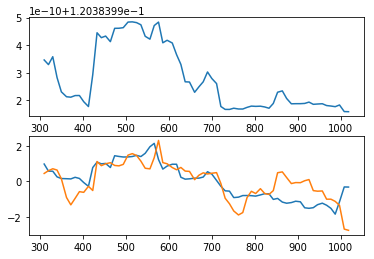

gesture 1_0_1; avg 0.008562479797695213; sd 1.4753866691586412e-18
gesture 1_0_1; PoV: 1.0


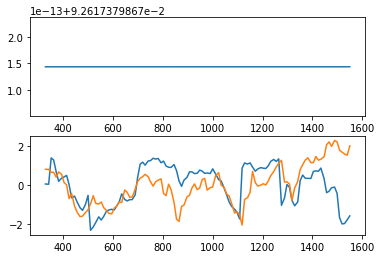

gesture 1_1_1; avg 0.013319660249228246; sd 2.369548514688461e-18
gesture 1_1_1; PoV: 1.0


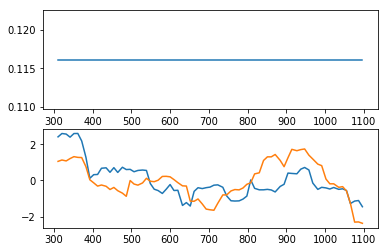

gesture 1_1_2; avg 0.0156563172727111; sd 6.730573047283114e-18
gesture 1_1_2; PoV: 1.0


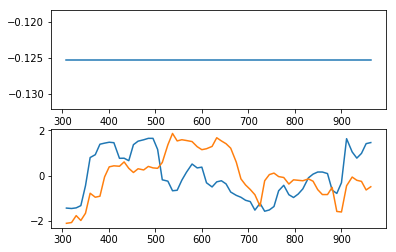

19
gesture 1_0_2; avg 0.015676662697892793; sd 2.161249202156446e-10
gesture 1_0_2; PoV: 0.9999999999999414


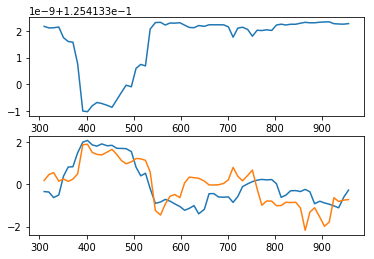

gesture 1_0_1; avg 0.019466731931938902; sd 2.343191727776799e-12
gesture 1_0_1; PoV: 0.9999999999999998


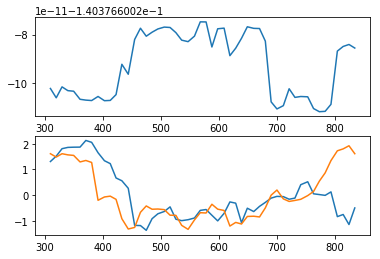

gesture 1_1_1; avg 0.016501321259773518; sd 3.616895739100983e-18
gesture 1_1_1; PoV: 1.0


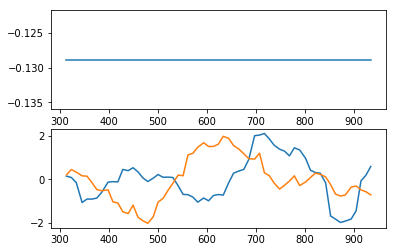

gesture 1_1_2; avg 0.012904998900716818; sd 2.7484210483974278e-08
gesture 1_1_2; PoV: 0.9999999991052473


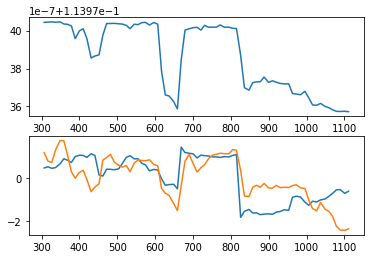

26
gesture 1_0_2; avg 0.015356219950551517; sd 3.0222242462150533e-13
gesture 1_0_2; PoV: 1.0


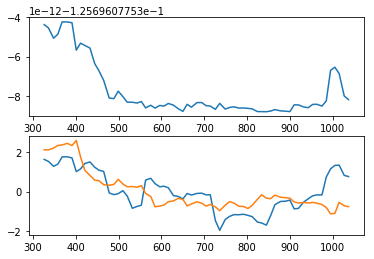

gesture 1_0_1; avg 0.005038059932808944; sd 1.0462732364443755e-18
gesture 1_0_1; PoV: 1.0000000000000002


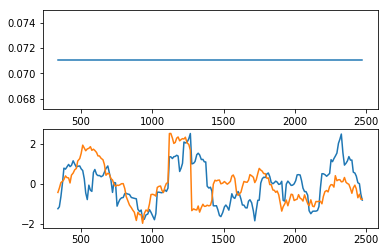

gesture 1_1_1; avg 0.01897361271316338; sd 1.1759455103033006e-06
gesture 1_1_1; PoV: 0.9999999634588417


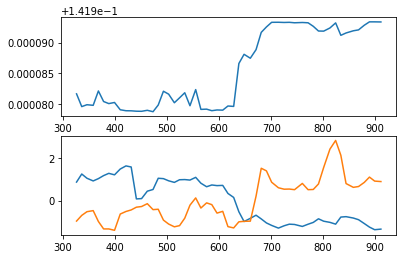

gesture 1_1_2; avg 0.017893030714976582; sd 6.246344256847227e-18
gesture 1_1_2; PoV: 1.0


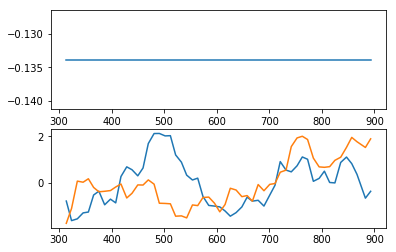

21
gesture 1_0_2; avg 0.01696516362381681; sd 1.5931485396620441e-18
gesture 1_0_2; PoV: 0.9999999999999998


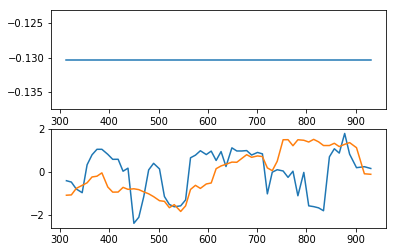

gesture 1_0_1; avg 0.016923137474615737; sd 5.442045824834181e-14
gesture 1_0_1; PoV: 1.0


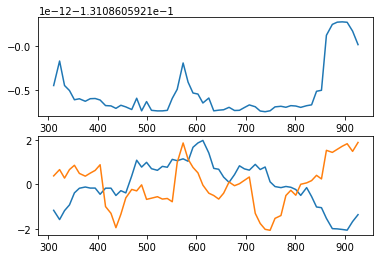

gesture 1_1_1; avg 0.02449915167945955; sd 0.00035408687199862027
gesture 1_1_1; PoV: 0.9998004634193864


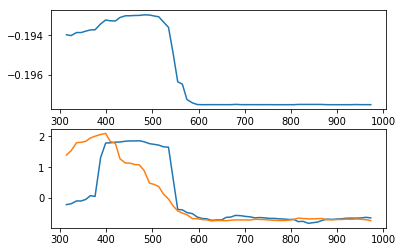

gesture 1_1_2; avg 0.013756849339147292; sd 5.410848763034783e-12
gesture 1_1_2; PoV: 1.0000000000000002


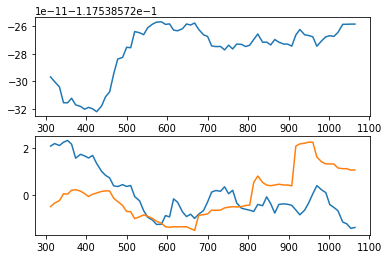

07
gesture 1_0_2; avg 0.01360612120345593; sd 2.006329923967956e-18
gesture 1_0_2; PoV: 1.0


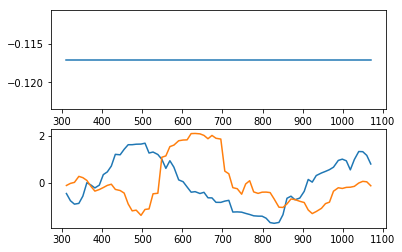

gesture 1_0_1; avg 0.01093317275946884; sd 1.7547952403968015e-18
gesture 1_0_1; PoV: 1.0


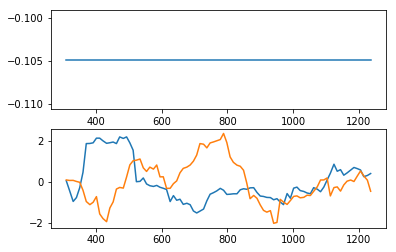

gesture 1_1_1; avg 0.014543670736771304; sd 2.3110509468850855e-18
gesture 1_1_1; PoV: 1.0


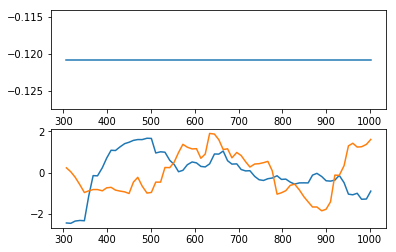

gesture 1_1_2; avg 0.012061834474698432; sd 1.904565151823046e-18
gesture 1_1_2; PoV: 1.0


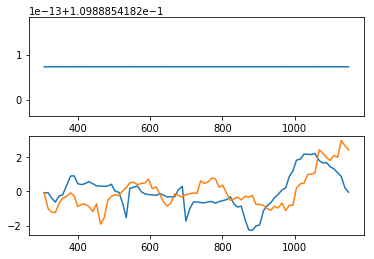

36
gesture 1_0_2; avg 0.017666290632151034; sd 1.3536647249880554e-05
gesture 1_0_2; PoV: 0.9999936107397723


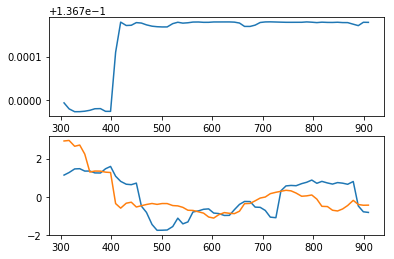

gesture 1_0_1; avg 0.016943372076110876; sd 1.4956759855392494e-15
gesture 1_0_1; PoV: 1.0


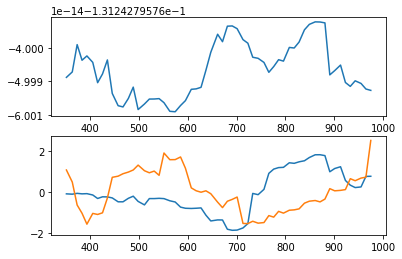

gesture 1_1_1; avg 0.013626731996625821; sd 3.429497914024654e-18
gesture 1_1_1; PoV: 1.0


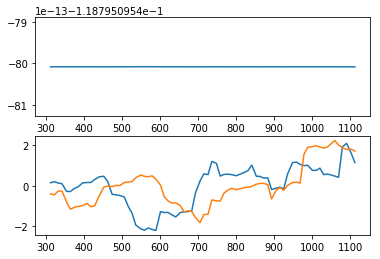

gesture 1_1_2; avg 0.015174083359986249; sd 2.3912379684558833e-18
gesture 1_1_2; PoV: 1.0000000000000002


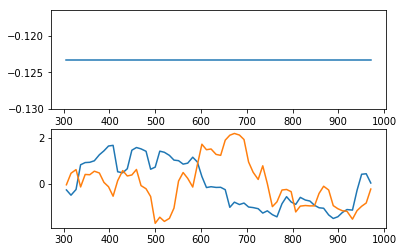

09
gesture 1_0_2; avg 0.014454077424813838; sd 3.001357071050339e-18
gesture 1_0_2; PoV: 1.0


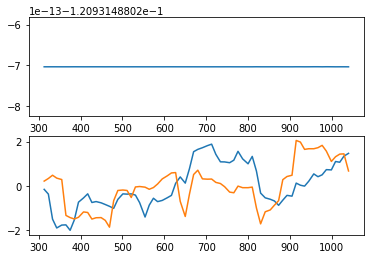

gesture 1_0_1; avg 0.012023185802250258; sd 3.192730462458073e-15
gesture 1_0_1; PoV: 0.9999999999999998


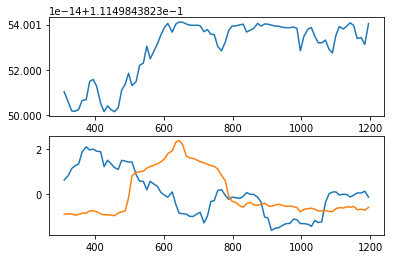

gesture 1_1_1; avg 0.0151903063171715; sd 3.1808693776943713e-18
gesture 1_1_1; PoV: 1.0


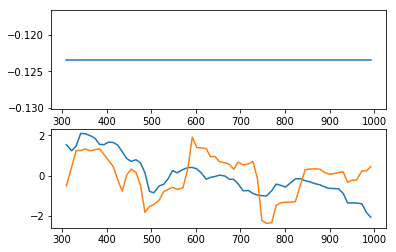

gesture 1_1_2; avg 0.01369793473984033; sd 2.386158965630699e-18
gesture 1_1_2; PoV: 1.0


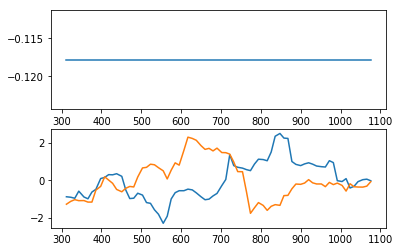

31
gesture 1_0_2; avg 0.015281205085156787; sd 1.886412405754543e-16
gesture 1_0_2; PoV: 1.0


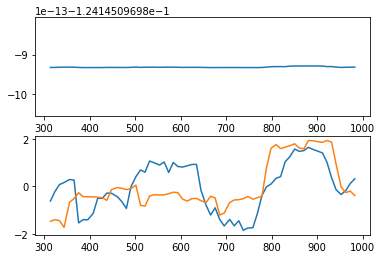

gesture 1_0_1; avg 0.010564222502467777; sd 1.9983085391540726e-18
gesture 1_0_1; PoV: 1.0


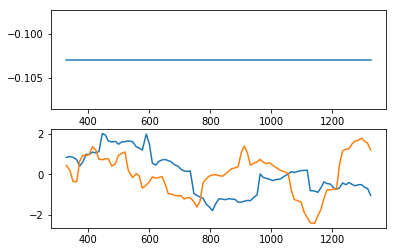

gesture 1_1_1; avg 0.015744303074940746; sd 5.935797482130874e-18
gesture 1_1_1; PoV: 1.0


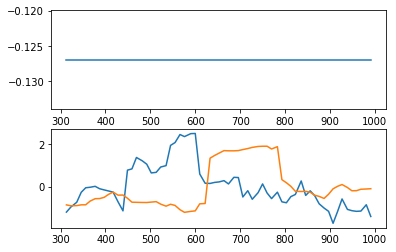

gesture 1_1_2; avg 0.016161895412528323; sd 3.7663238725058686e-18
gesture 1_1_2; PoV: 1.0


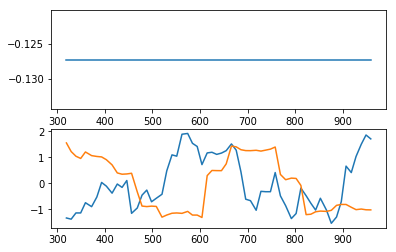

30
gesture 1_0_2; avg 0.013370160253352048; sd 1.3181396436203518e-12
gesture 1_0_2; PoV: 1.0


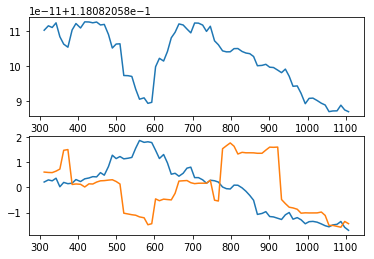

gesture 1_0_1; avg 0.010761383123762633; sd 7.2658459050001e-10
gesture 1_0_1; PoV: 0.9999999999986652


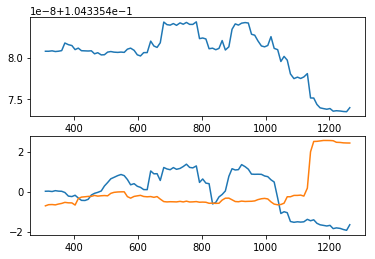

gesture 1_1_1; avg 0.012082253847198146; sd 2.3063058796667415e-12
gesture 1_1_1; PoV: 0.9999999999999998


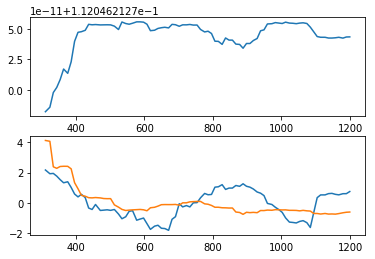

gesture 1_1_2; avg 0.011630769180479922; sd 1.971728665078019e-18
gesture 1_1_2; PoV: 1.0


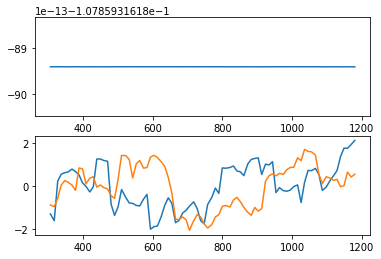

08
gesture 1_0_2; avg 0.016326110601645585; sd 8.835996413018926e-08
gesture 1_0_2; PoV: 0.9999999952489939


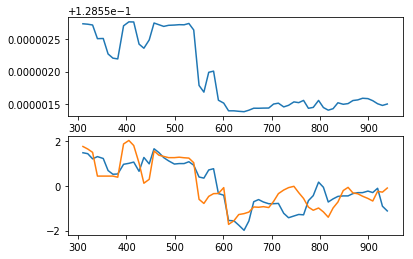

gesture 1_0_1; avg 0.015047102057486135; sd 2.649032643828581e-18
gesture 1_0_1; PoV: 1.0


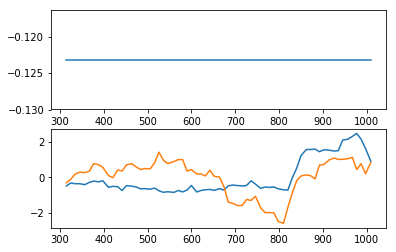

gesture 1_1_1; avg 0.01635313237351946; sd 4.605568667276977e-14
gesture 1_1_1; PoV: 0.9999999999999998


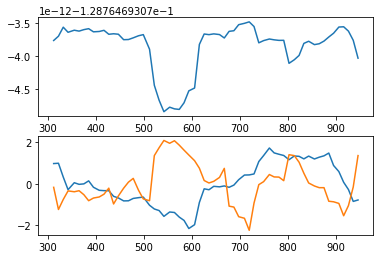

gesture 1_1_2; avg 0.013601714694267814; sd 2.081478090527918e-18
gesture 1_1_2; PoV: 1.0


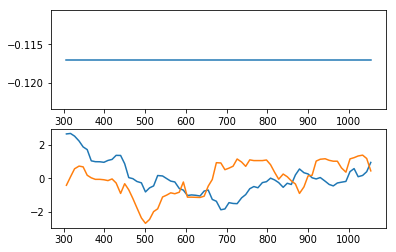

01
gesture 1_0_2; avg 0.01226207326769603; sd 1.7011172698268182e-18
gesture 1_0_2; PoV: 1.0


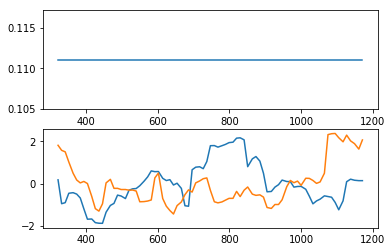

gesture 1_0_1; avg 0.011008321280849302; sd 2.9602551873143524e-15
gesture 1_0_1; PoV: 1.0


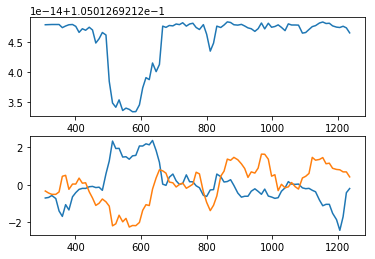

gesture 1_1_1; avg 0.01459098182345968; sd 2.9188380678758835e-18
gesture 1_1_1; PoV: 1.0


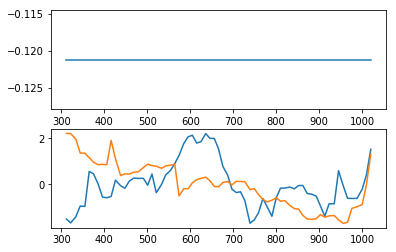

gesture 1_1_2; avg 0.015568387102757236; sd 2.074642146187672e-18
gesture 1_1_2; PoV: 1.0000000000000002


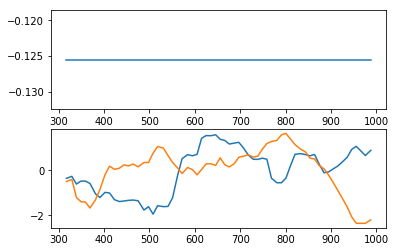

06
gesture 1_0_2; avg 0.01856733281662631; sd 4.5198624516384384e-18
gesture 1_0_2; PoV: 1.0


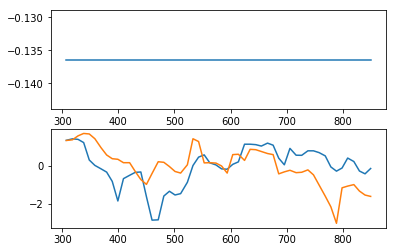

gesture 1_0_1; avg 0.014965910449674965; sd 1.133874151280668e-16
gesture 1_0_1; PoV: 1.0000000000000002


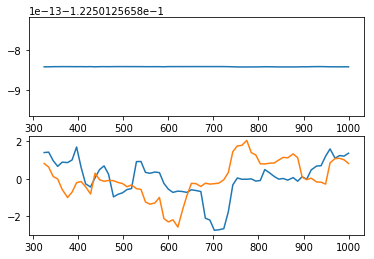

gesture 1_1_1; avg 0.013630325484859962; sd 1.1815439105798066e-15
gesture 1_1_1; PoV: 0.9999999999999998


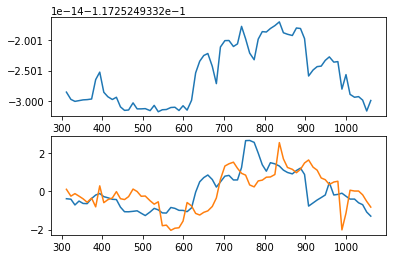

gesture 1_1_2; avg 0.0275472083077531; sd 1.3365266019744644e-17
gesture 1_1_2; PoV: 1.0


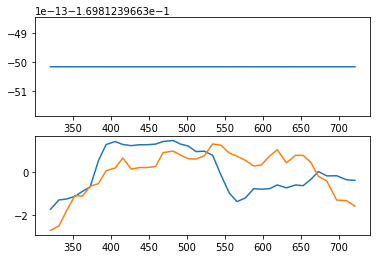

24
gesture 1_0_2; avg 0.013838347988213484; sd 7.565095935132165e-13
gesture 1_0_2; PoV: 1.0


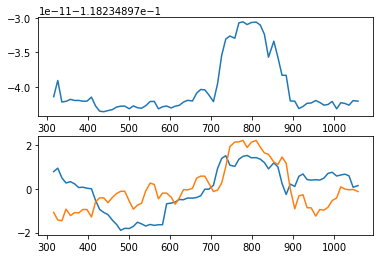

gesture 1_0_1; avg 0.012939051903623097; sd 4.381853210848514e-18
gesture 1_0_1; PoV: 1.0


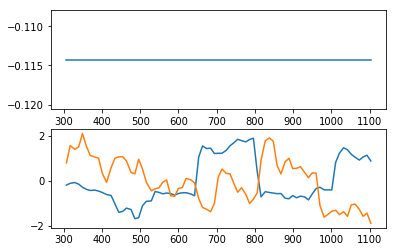

gesture 1_1_1; avg 0.01593629404829095; sd 6.73011236968152e-18
gesture 1_1_1; PoV: 0.9999999999999998


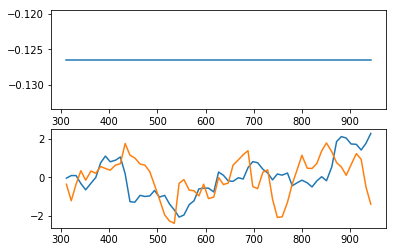

gesture 1_1_2; avg 0.014251419257911823; sd 4.9772826056669765e-11
gesture 1_1_2; PoV: 0.999999999999996


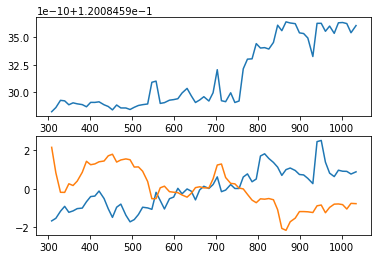

23
gesture 1_0_2; avg 0.014504202780972749; sd 1.0908906855002571e-12
gesture 1_0_2; PoV: 1.0


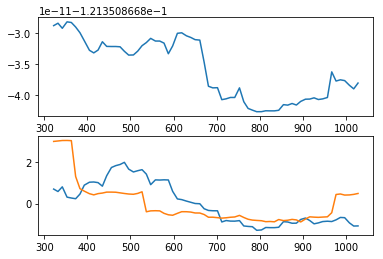

gesture 1_0_1; avg 0.01202982834635585; sd 2.6924638574516376e-18
gesture 1_0_1; PoV: 1.0


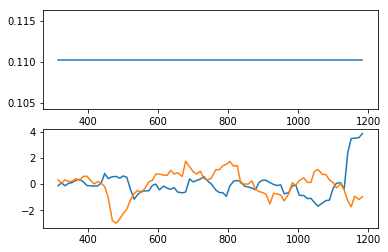

gesture 1_1_1; avg 0.011901152682936492; sd 1.813948178207453e-18
gesture 1_1_1; PoV: 1.0


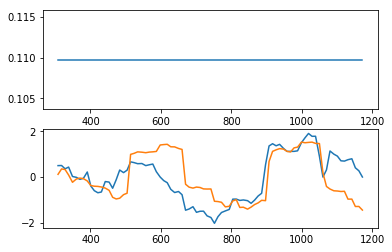

gesture 1_1_2; avg 0.01307087130361707; sd 1.9500170785817526e-18
gesture 1_1_2; PoV: 1.0


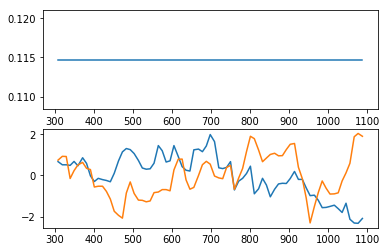

15
gesture 1_0_2; avg 0.01555269672342879; sd 2.8924639889054685e-08
gesture 1_0_2; PoV: 0.9999999995628093


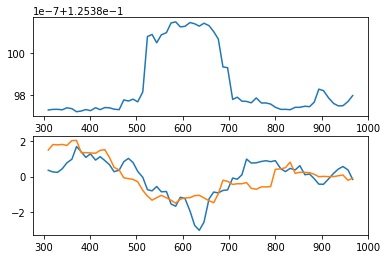

gesture 1_0_1; avg 0.01705666871226947; sd 2.5431953948320398e-12
gesture 1_0_1; PoV: 1.0


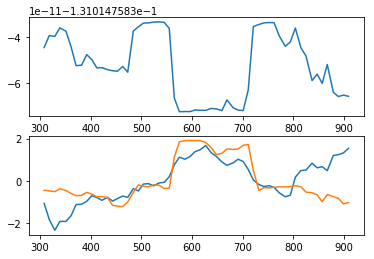

gesture 1_1_1; avg 0.016019006296777494; sd 1.430775808321104e-18
gesture 1_1_1; PoV: 0.9999999999999998


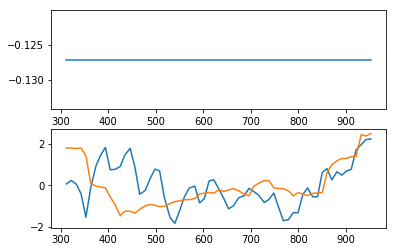

gesture 1_1_2; avg 0.014691085414835206; sd 2.402876866303181e-05
gesture 1_1_2; PoV: 0.9999922801298134


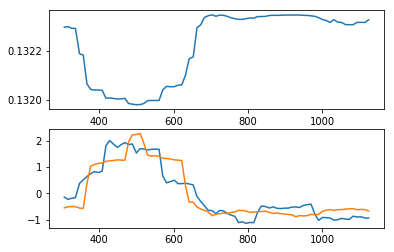

12
gesture 1_0_2; avg 0.01571513180080982; sd 2.308867012406534e-18
gesture 1_0_2; PoV: 1.0


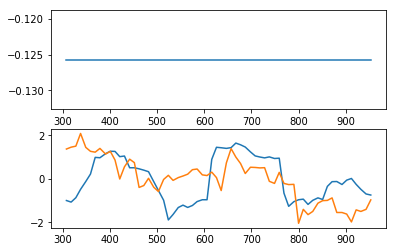

gesture 1_0_1; avg 0.013511923927781732; sd 2.4031408844030835e-18
gesture 1_0_1; PoV: 1.0


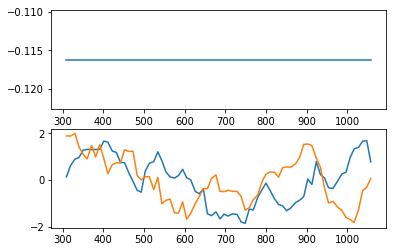

gesture 1_1_1; avg 0.013956715721017619; sd 8.636790018850965e-09
gesture 1_1_1; PoV: 0.9999999999477409


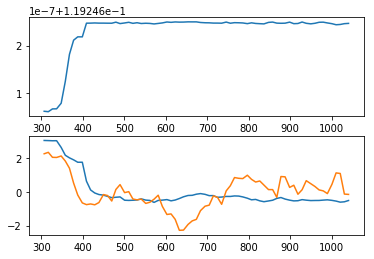

gesture 1_1_2; avg 0.013503649335074905; sd 2.6875215854002443e-18
gesture 1_1_2; PoV: 0.9999999999999996


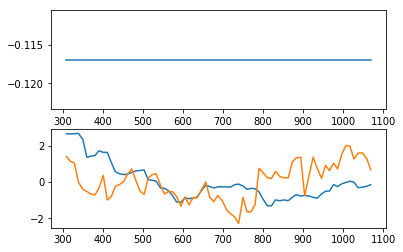

13
gesture 1_0_2; avg 0.00975077826299802; sd 2.352336268319826e-18
gesture 1_0_2; PoV: 1.0


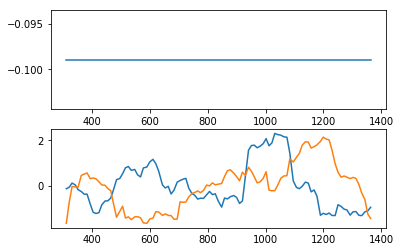

gesture 1_0_1; avg 0.005561586875165214; sd 1.4737195009531607e-18
gesture 1_0_1; PoV: 0.9999999999999998


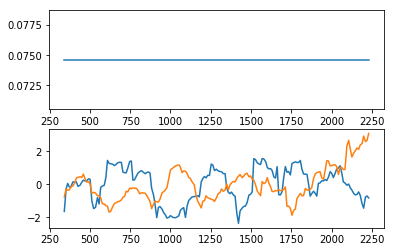

gesture 1_1_1; avg 0.012707245593721352; sd 3.349880766323631e-18
gesture 1_1_1; PoV: 1.0


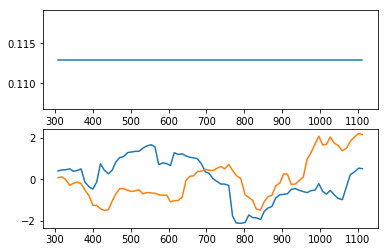

gesture 1_1_2; avg 0.011143175692325261; sd 2.5150351604389222e-18
gesture 1_1_2; PoV: 1.0


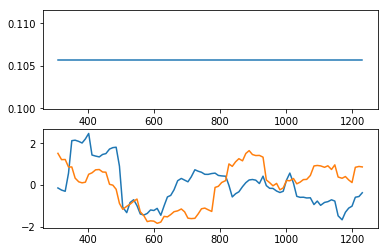

14
gesture 1_0_2; avg 0.014225142858399705; sd 1.3089372106855815e-15
gesture 1_0_2; PoV: 0.9999999999999998


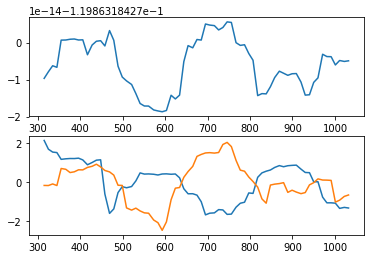

gesture 1_0_1; avg 0.012722677483267041; sd 4.59237252288161e-15
gesture 1_0_1; PoV: 1.0


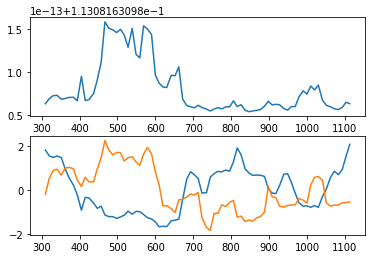

gesture 1_1_1; avg 0.02030583678348157; sd 5.632408205795793e-12
gesture 1_1_1; PoV: 0.9999999999999998


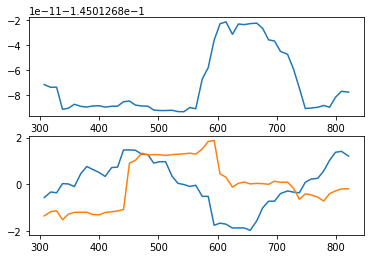

gesture 1_1_2; avg 0.013355414882442983; sd 5.763042763242165e-18
gesture 1_1_2; PoV: 1.0


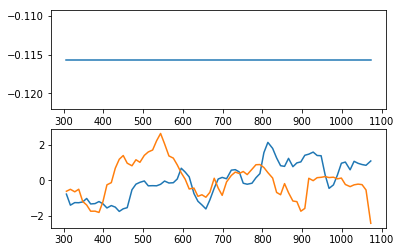

22
gesture 1_0_2; avg 0.014138224600365722; sd 2.0192135826637343e-18
gesture 1_0_2; PoV: 1.0


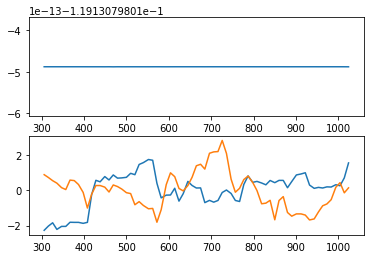

gesture 1_0_1; avg 0.017105057907409932; sd 4.735836626741319e-18
gesture 1_0_1; PoV: 1.0000000000000002


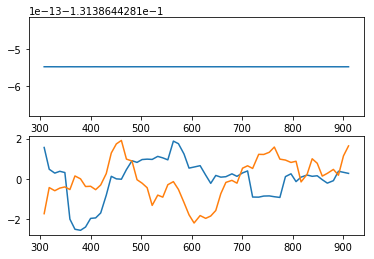

gesture 1_1_1; avg 0.015332047836210515; sd 4.587971042724089e-10
gesture 1_1_1; PoV: 0.9999999999999013


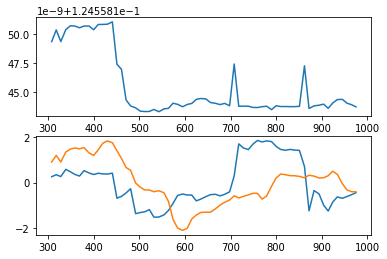

gesture 1_1_2; avg 0.0195541324684473; sd 3.6109446733033744e-12
gesture 1_1_2; PoV: 1.0


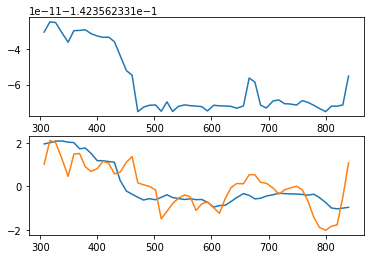

25
gesture 1_0_2; avg 0.016289776474001805; sd 4.2785633579112664e-18
gesture 1_0_2; PoV: 1.0


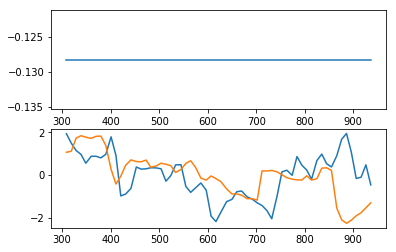

gesture 1_0_1; avg 0.014710769280576628; sd 4.1882534521790076e-18
gesture 1_0_1; PoV: 1.0


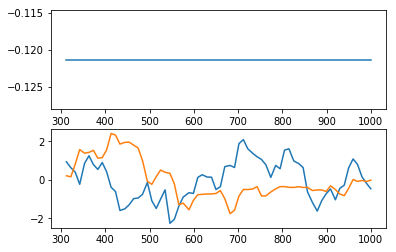

gesture 1_1_1; avg 0.0120688091721677; sd 6.338079618601076e-15
gesture 1_1_1; PoV: 0.9999999999999998


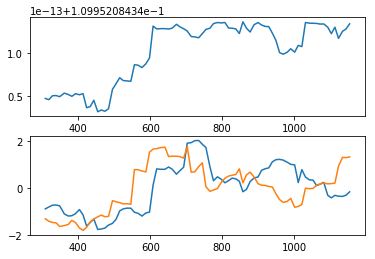

gesture 1_1_2; avg 0.015967958494289135; sd 7.538427965406988e-15
gesture 1_1_2; PoV: 1.0


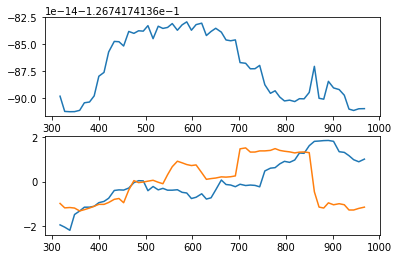

In [29]:
for s, gdict in g1_dict_antag.items():
    print(s)
    for g, a in gdict.items():
        print(f"gesture {g}; avg {a.mean()}; sd {a.std()}")
        evals, evecs = la.eig(a)
        evals = evals.real
        sort_idx = np.argsort(-evals)
        evals = evals[sort_idx]
        evecs = evecs[:, sort_idx]
        # calc percent of variance explained
        print(f"gesture {g}; PoV: {evals[0].real / evals.real.sum()}")
        # do PCA
        res = a @ evecs[:, 0]
        # plot results
        plt.subplot(211)
        plt.plot(dc.data_set_smooth[s][g][:,0], res.real)
        plt.subplot(212)
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,1])
        plt.plot(dc.data_set_smooth[s][g][:,0], dc.data_set_smooth[s][g][:,2])
        plt.show()

In [31]:
g1_dict_antag["01"]["1_0_2"].shape

(82, 82)